In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import math
from scipy import stats
from scipy.stats import norm
from scipy.special import softmax
from sklearn.metrics import classification_report
import plotly.graph_objects as grp
from  dataclasses import dataclass
import keras
from sklearn.preprocessing import OneHotEncoder
from scipy import optimize
from sklearn.metrics import multilabel_confusion_matrix
import plotly.subplots as sp
import plotly.graph_objects as go
import missingno as msno
from pandas.core.common import random_state
from scipy import optimize
from sklearn import svm
from scipy.optimize import Bounds, minimize
from os import supports_effective_ids

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv"
df = pd.read_csv(url)
df = pd.DataFrame(df)
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [3]:
num_cols = ['S1_Temp','S2_Temp','S3_Temp','S4_Temp','S1_Light','S2_Light','S3_Light','S4_Light','S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2','S5_CO2_Slope']
cat_cols = ['S6_PIR','S7_PIR','Room_Occupancy_Count']

# Exploratory Data Analysis

In [4]:
df.shape

(10129, 19)

## Data types of columns

In [5]:
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

## Checking for Missing Values

In [6]:
df.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [7]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


## Unique values in each column

In [8]:
df.nunique()

Date                        7
Time                    10129
S1_Temp                    24
S2_Temp                    69
S3_Temp                    29
S4_Temp                    27
S1_Light                   68
S2_Light                   82
S3_Light                  177
S4_Light                   75
S1_Sound                  231
S2_Sound                  185
S3_Sound                  258
S4_Sound                  106
S5_CO2                    186
S5_CO2_Slope             1579
S6_PIR                      2
S7_PIR                      2
Room_Occupancy_Count        4
dtype: int64

## Seasonality check

In [9]:
df['Date'].unique()

array(['2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2018/01/10', '2018/01/11'], dtype=object)

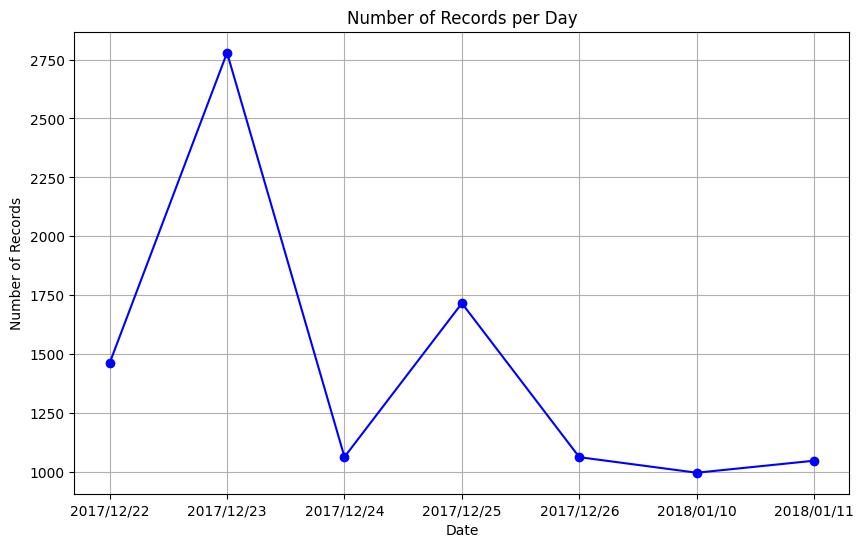

In [10]:
# Group by date and count the number of records for each day
daily_counts = df.groupby('Date').size().reset_index(name='count')
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['Date'], daily_counts['count'], marker='o', linestyle='-', color='b')
plt.title('Number of Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

In [11]:
df['Date_time'] = pd.to_datetime(df['Date'] +' '+ df['Time'])
dt_time = df.pop('Date_time')
df.insert(2, 'Date_time', dt_time)

df['Hours'] = df['Date_time'].dt.hour
df['Time_of_Day'] = pd.cut(df['Hours'], bins = [0,6,12,17,22,24], labels = ['Night','Morning','Afternoon','Evening','Night'], include_lowest=True, ordered = False)

df.pop('Hours')
day_time = df.pop('Time_of_Day')
df.insert(2, 'Time_of_Day', day_time)

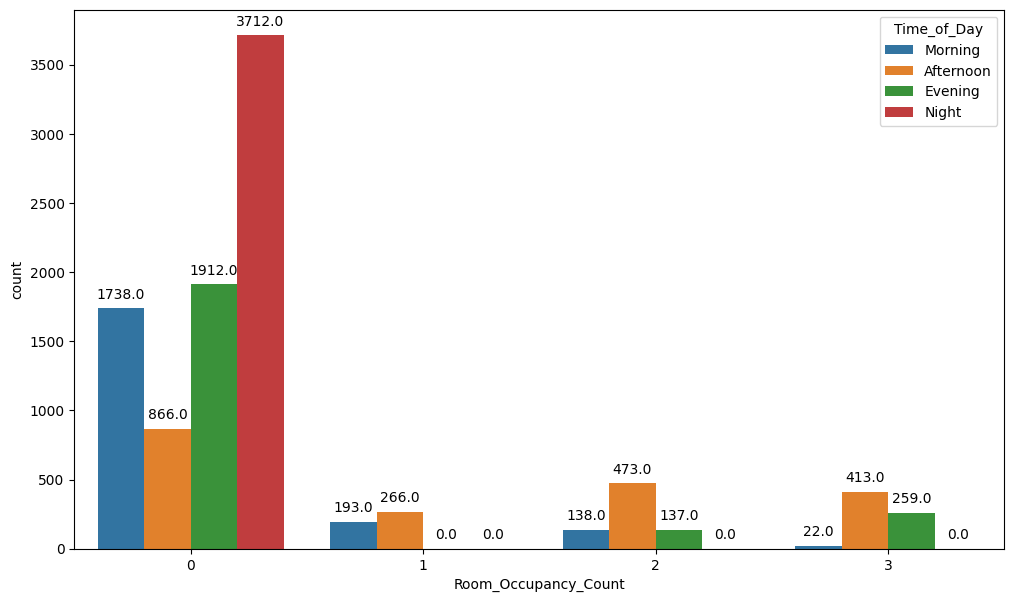

In [12]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data = df,x = 'Room_Occupancy_Count', hue = 'Time_of_Day', hue_order = ['Morning','Afternoon','Evening','Night'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [13]:
# Group by date and time_of_day, calculate average room occupancy
avg_occupancy = df.groupby(['Date_time', 'Time_of_Day'])['Room_Occupancy_Count'].mean().reset_index()

# Pivot the DataFrame for easier plotting
pivot_df = avg_occupancy.pivot(index='Date_time', columns='Time_of_Day', values='Room_Occupancy_Count')



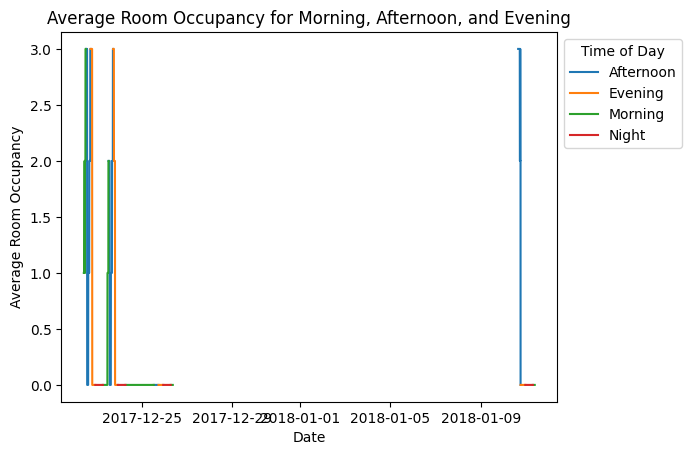

In [14]:
# Plot lines for each time of day
for time_of_day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[time_of_day], label=time_of_day)

plt.title('Average Room Occupancy for Morning, Afternoon, and Evening')
plt.xlabel('Date')
plt.ylabel('Average Room Occupancy')
plt.legend(title='Time of Day', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

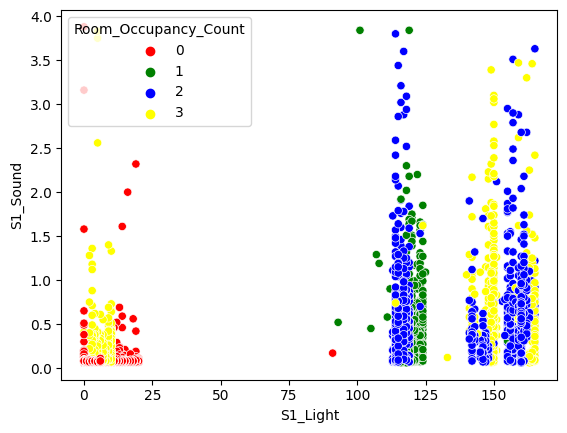

In [15]:
sns.scatterplot(data = df, x = 'S1_Light', y = 'S1_Sound', hue = 'Room_Occupancy_Count', palette = ['Red','Green','Blue','Yellow'])
plt.show()

# Data is linearly separable

## Boxplot showing range and outliers for each numerical column

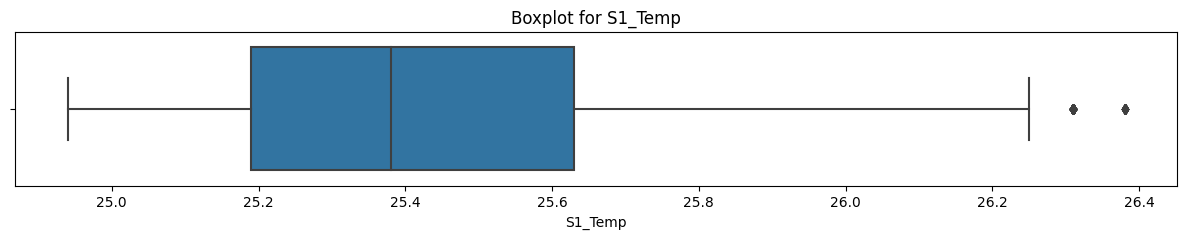

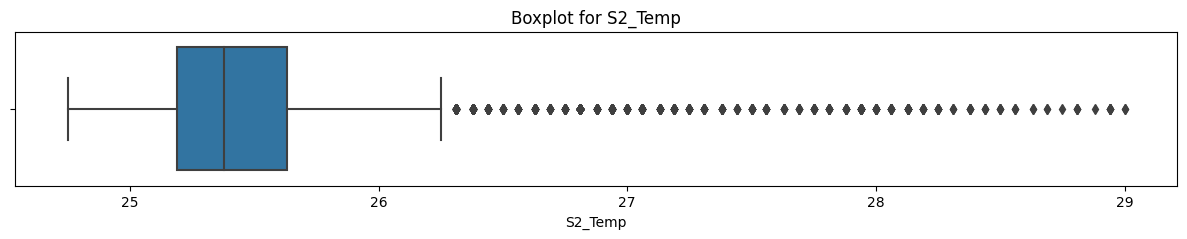

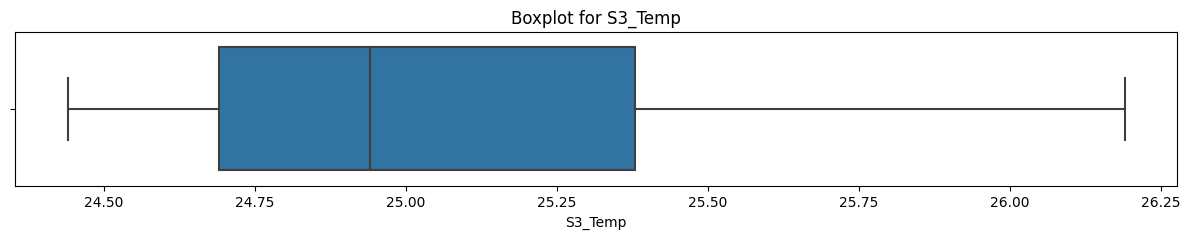

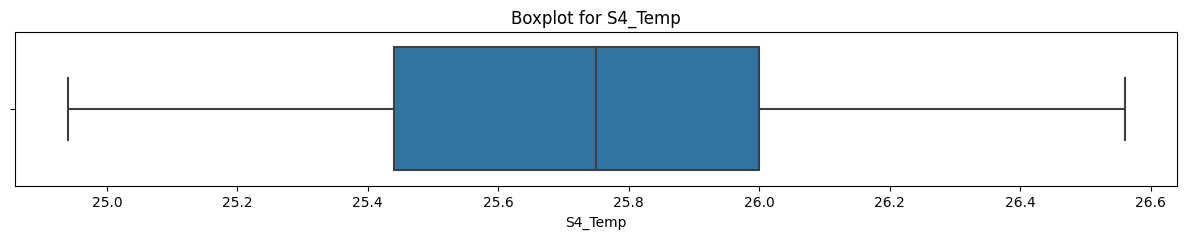

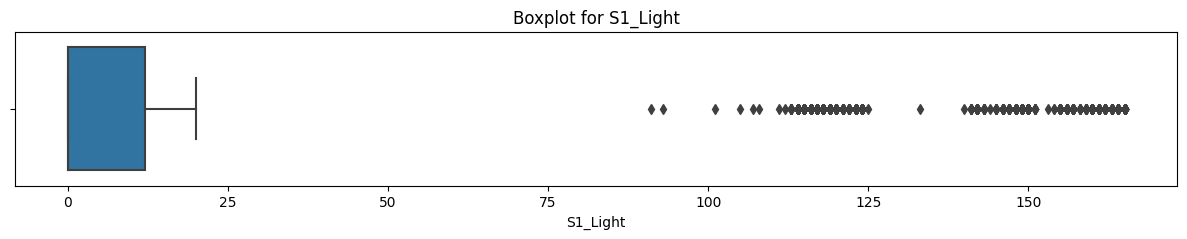

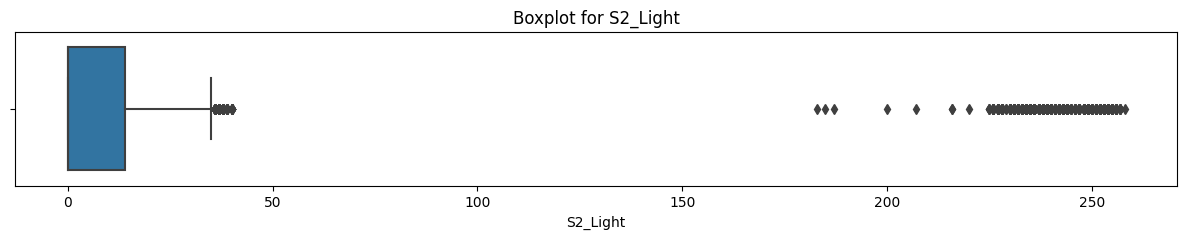

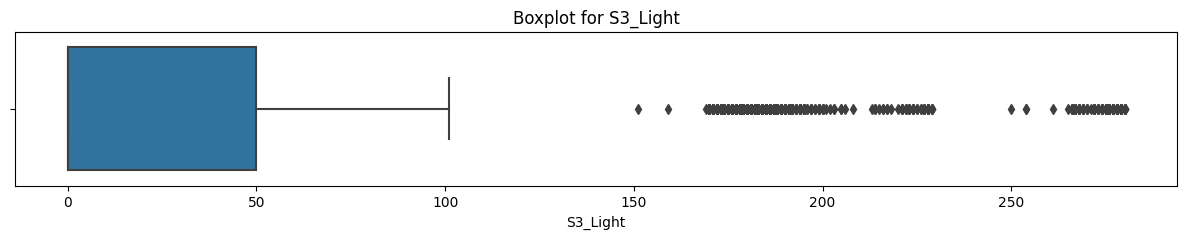

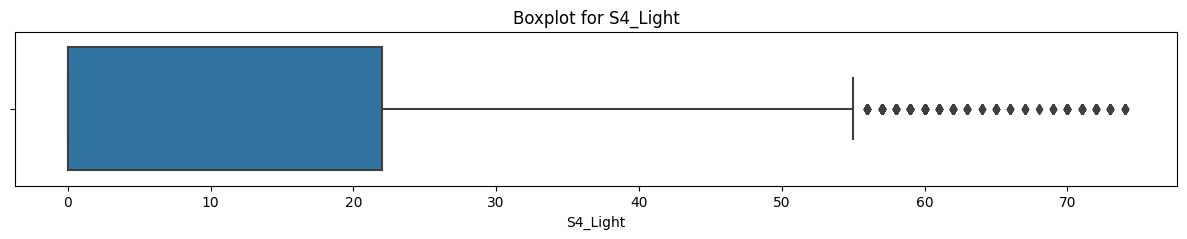

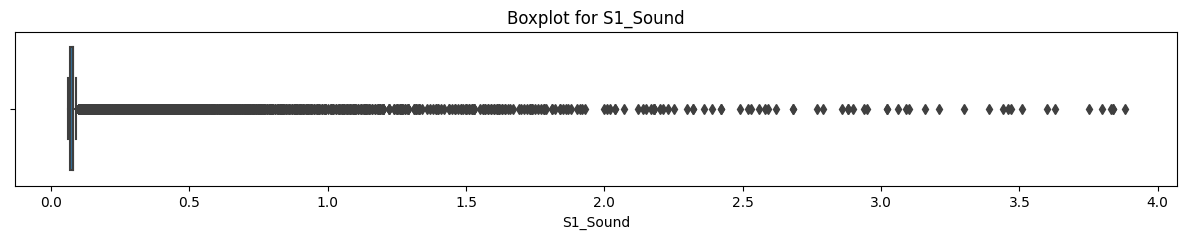

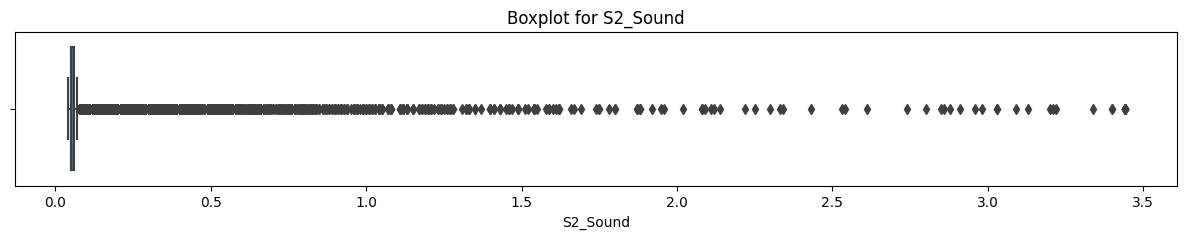

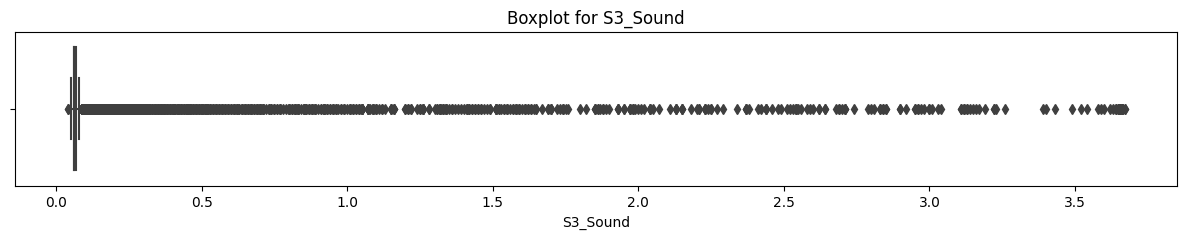

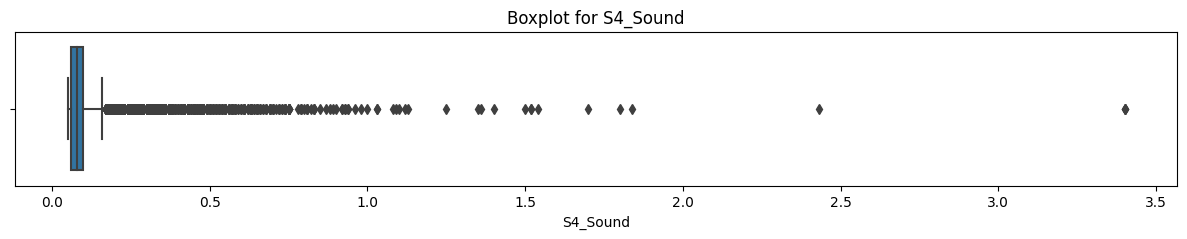

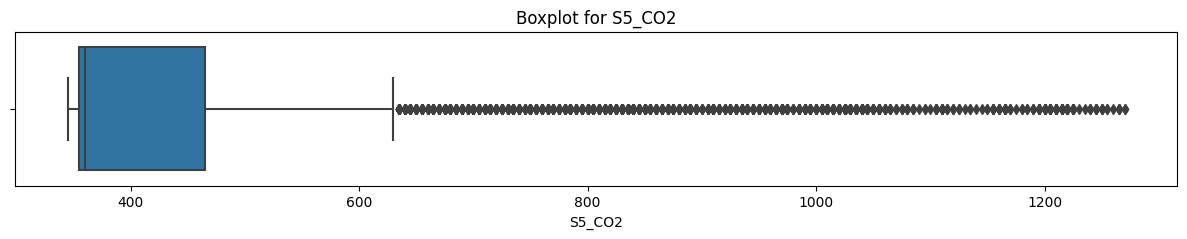

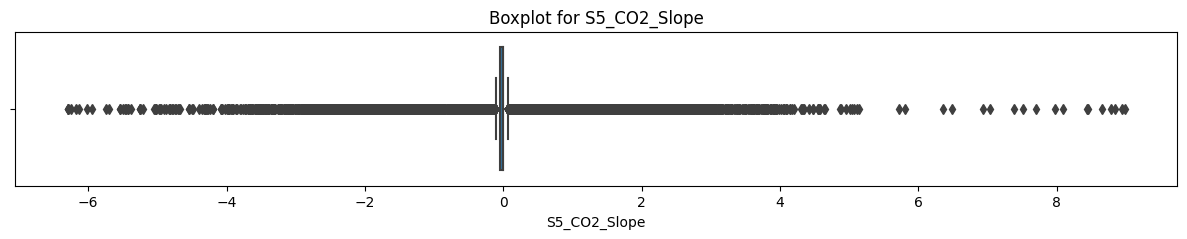

In [16]:
for i in num_cols:
  plt.figure(figsize=(15,2))
  sns.boxplot(data = df, x = i)
  plt.title('Boxplot for {}'.format(i))

## Correlation between numerical features

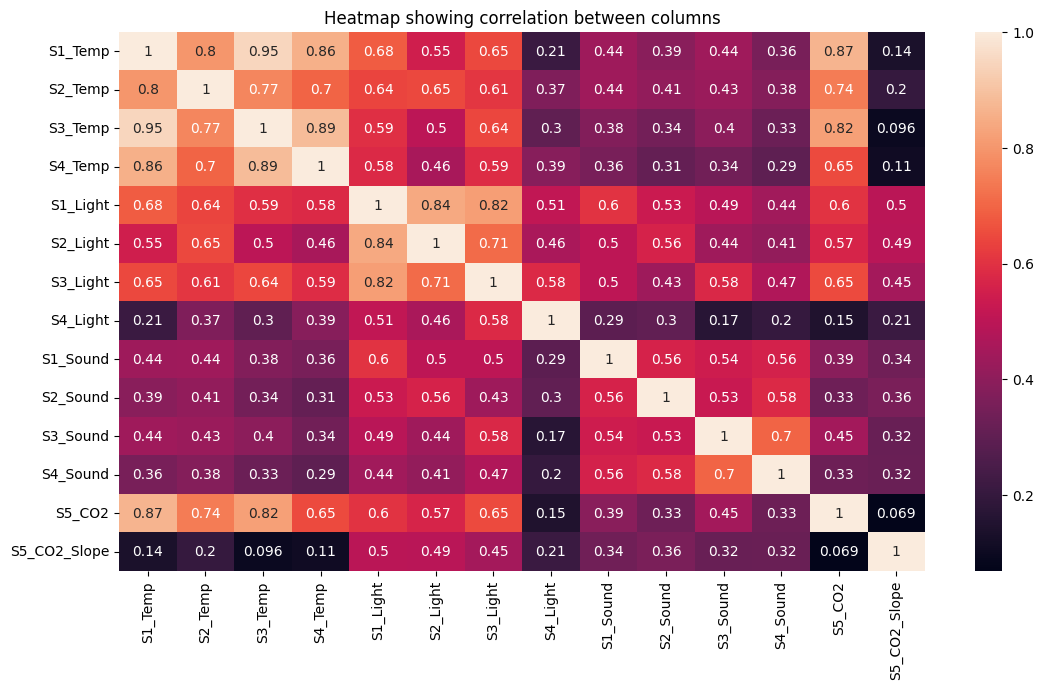

In [17]:
plt.figure(figsize=(13,7))
sns.heatmap(df[num_cols].corr(),annot = True)
plt.title('Heatmap showing correlation between columns')
plt.show()

## Count of Room Occupancy

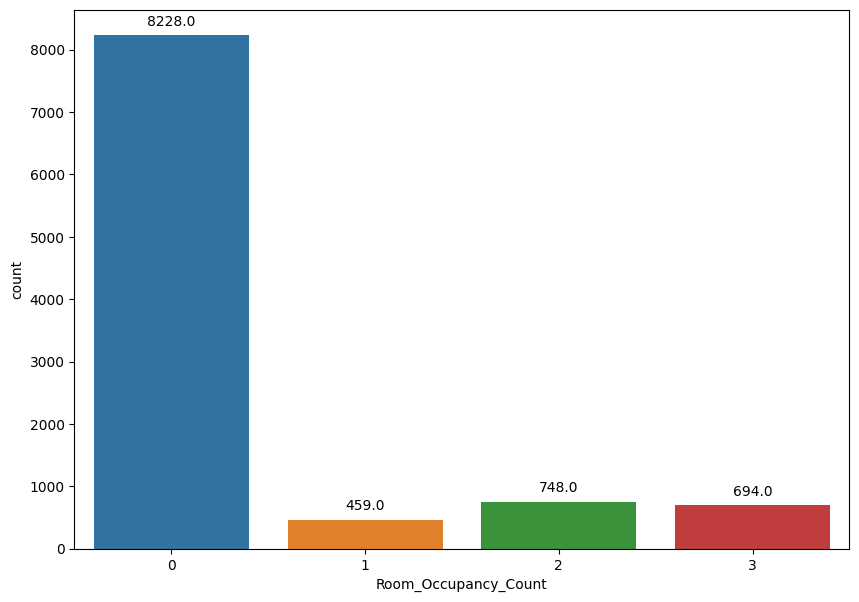

In [18]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data = df,x = 'Room_Occupancy_Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

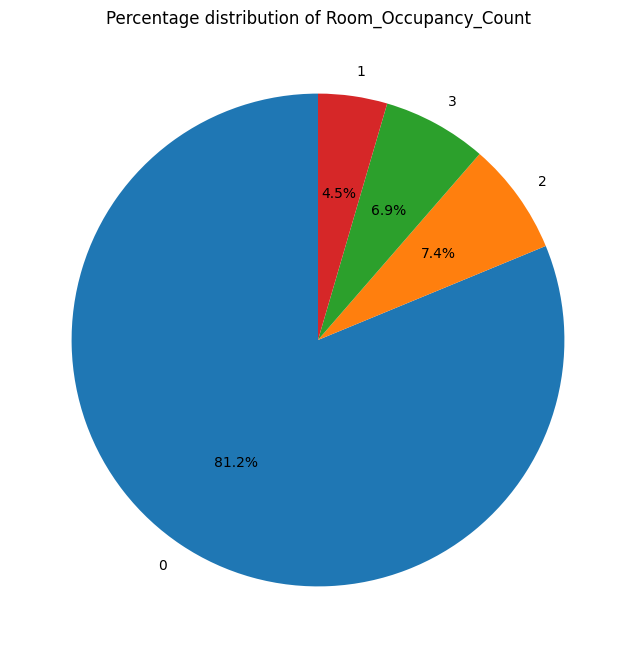

In [19]:
value_counts = df['Room_Occupancy_Count'].value_counts()

percentages = (value_counts / value_counts.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of Room_Occupancy_Count')
plt.show()

# Data Pre-processing

In [20]:
label_encoder = LabelEncoder()
df['Time_of_Day'] = label_encoder.fit_transform(df['Time_of_Day'])

## Removing columns with high correlation (> 0.9) and also removing redundant columns

In [21]:
df1 = df.copy()

In [22]:
df1.drop(columns=['Date','Time','Date_time','S1_Temp','S3_Temp'],axis=1,inplace=True)

In [23]:
df1.head()

,Time_of_Day,S2_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2,24.75,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2,24.75,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2,24.75,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2,24.75,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2,24.75,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


## Functions for splitting data and standardization

In [24]:
def split_data(data):

  X = data.loc[:, data.columns!='Room_Occupancy_Count']
  y = data['Room_Occupancy_Count']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify = y)

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify = y_train)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [25]:
def standardize_data(X_train, X_val, X_test):
  mean = np.mean(X_train,axis=0)
  std = np.std(X_train,axis=0)

  X_train = (X_train - mean) / std
  X_val = (X_val - mean) / std
  X_test = (X_test - mean) / std

  return X_train, X_val, X_test

## Baseline Model evaluation

In [26]:
X_dummy_train, X_dummy_val, X_dummy_test, y_dummy_train, y_dummy_val, y_dummy_test = split_data(df1)
X_dummy_train, X_dummy_val, X_dummy_test = standardize_data(X_dummy_train, X_dummy_val, X_dummy_test)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

class RandomClassifier:

    def __init__(self, num_classes):
        self.num_classes = num_classes

    def predict(self, X):
        return np.random.randint(low=0, high=self.num_classes, size=X.shape[0])

def baseline_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def baseline_evaluate(y_true, y_pred):
    acc = round((baseline_accuracy(y_true, y_pred))*100,2)
    precision = round((precision_score(y_true, y_pred, average='weighted'))*100,2)
    recall = round((recall_score(y_true, y_pred, average='weighted'))*100,2)
    f1 = round((f1_score(y_true, y_pred, average='weighted'))*100,2)

    print(f"Accuracy : {acc}")
    print(f"Precision : {precision}")
    print(f"Recall : {recall}")
    print(f"F1 Score : {f1}")

random_model = RandomClassifier(4)

y_true = y_dummy_test.values
y_pred_random = random_model.predict(X_dummy_test.values)

baseline_evaluate(y_true, y_pred_random)


Accuracy : 23.4
Precision : 65.83
Recall : 23.4
F1 Score : 31.03


In [28]:
# Class for calculating Principal components and returning transformed dataframe with PCA applied
class PCA():

# Initialization of required parameters of class
    def __init__(self, X):
        self.X = X
        self.num_pcas = None
        self.mean = None
        self.std = None
        self.eigen_val = None
        self.eigen_vec = None

# Function to fit data and return principal components
    def fit(self):
        self.mean = np.mean(self.X, axis=0)
        self.std = np.std(self.X, axis=0)
# Normalizing dataframe
        X_std = (self.X - self.mean) / self.std
# Calculating covariance matrix of normalized dataframe
        cov_matrix = np.cov(X_std, rowvar=False)

# Using eigen value decomposition to get eigen values and eigen vectors for the matrix
        self.eigen_val, self.eigen_vec = np.linalg.eig(cov_matrix)

# Sorting eigen vectors in decreasing order of eigen values
        sorted_eigen = np.argsort(self.eigen_val)[::-1]
        self.eigen_val = self.eigen_val[sorted_eigen]
        self.eigen_vec = self.eigen_vec[:, sorted_eigen]

# Calculating total cumulative captured variance
        cum_var = []
        for i in range(1, len(self.eigen_val) + 1):
            pcas = self.eigen_val[0: i]
            cum_var.append(pcas.sum() / self.eigen_val.sum())
            print("Variance captured by {} Principal Components is {}%".format(i, round(pcas.sum() / self.eigen_val.sum() * 100, 2)))

# Function to transform dataframe based on number of components selected
    def transform(self, X, num_comp):

        top_eigenvec = self.eigen_vec[:, :num_comp]

        X_standard = (X - self.mean) / self.std

        X_pca = np.dot(X_standard, top_eigenvec)

        return X_pca

#Logistic regression

In [29]:
# Class for Logistic Regression
class LogisticRegression:

# Initialization of required parameters of class
    def __init__(self, df, output_column, learning_rate, max_iteration, epsilon, regularization_parameter,num_pcas):
        self.df = df
        self.output_column = output_column
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        self.epsilon = epsilon
        self.regularization_parameter = regularization_parameter
        self.num_pcas = num_pcas
        self.theta = None
        self.train_errors = []
        self.val_errors = []

# Function for splitting data into Train (60%), Validation (20%) and Test (20%)
    def split_data(self):
        X = self.df.drop('{}'.format(self.output_column), axis=1)
        y = self.df['{}'.format(self.output_column)]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify = y)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify = y_train)
        return X_train, X_val, X_test, y_train, y_val, y_test

# Normalizing train dataset using standardization formula: (X - mean) / standard deviation
    def normalize_train(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_normalized = (X - mean) / std
        return X_normalized, mean, std

# Normalizing validation and test sets using mean and standard deviation value from Train set
    def normalize_test_val(self, X, mean, std):
        X_normalized = (X - mean) / std
        return X_normalized

# Function to handle undersampling of majority class to the total size of all minority classes
    def undersample(self, X, y):
        class_values = y.value_counts()
        min_classes = class_values[class_values == class_values.min()].index

        max_class_values = y[~y.isin(min_classes)].index
        min_class_values = y[y.isin(min_classes)].index

        sample_max = np.random.choice(max_class_values, size=len(min_class_values), replace=False)

        X_sampled = pd.concat([X.loc[sample_max], X.loc[min_class_values]])
        y_sampled = pd.concat([y.loc[sample_max], y.loc[min_class_values]])

        return X_sampled, y_sampled

# Using SMOTE to oversample on minority classes
    def oversample(self, X, y):
        smote = SMOTE(random_state=42)
        X_sampled, y_sampled = smote.fit_resample(X, y)
        return X_sampled, y_sampled

# Softmax function calculated
    def softmax(self, X):
        e_scores = np.exp(np.array(X) - np.max(np.array(X), axis=1, keepdims=True))
        sm = e_scores / np.sum(e_scores, axis=1, keepdims=True)
        return sm

# Total error/ cost function for softmax
    def cost_function_softmax(self, X, y):
        prob = self.softmax(X.dot(self.theta))
        y_hat = (np.arange(prob.shape[1]) == y.to_numpy()[:, None]).astype(float)
        cost = -1/X.shape[0] * np.sum(y_hat * np.log(prob))
        reg_term = (self.regularization_parameter / (2 * X.shape[0])) * np.sum(self.theta**2)
        return (np.mean(cost + reg_term))/2

# Gradient of cost function
    def cost_derivative_softmax(self, X, y):
        prob = self.softmax(X.dot(self.theta))
        y_hat = (np.arange(prob.shape[1]) == y.to_numpy()[:, None]).astype(float)
        grad = 1/X.shape[0] * (X.T @ (prob - y_hat))
        reg_term = (self.regularization_parameter / X.shape[0]) * self.theta
        reg_term[0] = 0
        return (grad + reg_term)

# Function for gradient descent and calculation of Training vs Validation error plot
    def gradient_descent(self, X_train, y_train, X_val, y_val):
        for i in tqdm(range(self.max_iteration)):
            self.theta -= self.learning_rate * self.cost_derivative_softmax(X_train, y_train)
            t_error = self.cost_function_softmax(X_train, y_train)
            v_error = self.cost_function_softmax(X_val, y_val)
            self.train_errors.append(t_error)
            self.val_errors.append(v_error)

            if len(self.train_errors) > 1:
              if abs(self.train_errors[-2] - t_error) < self.epsilon:
                  print("Stopped Learning")
                  break

        self.plot_cost()

# Using softmax function to predict class with max probability
    def predict(self, X):
        X = np.column_stack([np.ones([X.shape[0], 1]), X])
        return np.argmax(self.softmax(X.dot(self.theta)), axis=1)

# Evaluation function to calculate Accuracy, Precision, Recall and F1 score
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)

     # Creating confusion matrix
        confusion_matrix = np.zeros((len(np.unique(y)), len(np.unique(y))))
        for i in range(len(y)):
            confusion_matrix[y.iloc[i], predictions[i]] += 1

        precision = np.mean(np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1))
        recall = np.mean(np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0))
        f1_sc = 2 * np.mean((precision * recall) / (precision + recall))

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1_sc}")

        return accuracy, precision, recall, f1_sc

# Finally calling fit function to process all the data and return evaluation metrics
    def fit(self):
        X_train, X_val, X_test, y_train, y_val, y_test = self.split_data()
        X_train, mean, std = self.normalize_train(X_train)
        X_val = self.normalize_test_val(X_val, mean, std)
        X_test = self.normalize_test_val(X_test, mean, std)

        X_train, y_train = self.undersample(X_train, y_train)
        X_train, y_train = self.oversample(X_train, y_train)

# If PCA is to be applied o dataframe
        if self.num_pcas:
            pca = PCA(X_train)
            pca.fit()
            X_train = pca.transform(X_train,self.num_pcas)
            X_val = pca.transform(X_val,self.num_pcas)
            X_test = pca.transform(X_test,self.num_pcas)

# Adding bias term to train and validation datasets
        X_train = np.column_stack([np.ones([X_train.shape[0], 1]), X_train])
        X_val = np.column_stack([np.ones([X_val.shape[0], 1]), X_val])

        # Initializing theta values
        self.theta = np.zeros((X_train.shape[1], len(np.unique(y_train))))

        self.gradient_descent(X_train, y_train, X_val, y_val)
        accuracy, precision, recall, f1_sc = self.evaluate(X_test,y_test)
        return accuracy, precision, recall, f1_sc

# Line plot for Training vs Validation error
    def plot_cost(self):
        plt.plot(self.train_errors, label='Training Error')
        plt.plot(self.val_errors, label='Validation Error')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Training vs Validation Error')
        plt.legend()
        plt.show()


## Logistic Regression with PCA

In [30]:
lr1 = LogisticRegression(df1, 'Room_Occupancy_Count', learning_rate=0.1, max_iteration=2000, epsilon=0.00001, regularization_parameter=0.1,num_pcas=8)

Variance captured by 1 Principal Components is 46.66%
Variance captured by 2 Principal Components is 59.05%
Variance captured by 3 Principal Components is 69.45%
Variance captured by 4 Principal Components is 76.43%
Variance captured by 5 Principal Components is 80.85%
Variance captured by 6 Principal Components is 84.79%
Variance captured by 7 Principal Components is 88.48%
Variance captured by 8 Principal Components is 91.79%
Variance captured by 9 Principal Components is 94.27%
Variance captured by 10 Principal Components is 95.74%
Variance captured by 11 Principal Components is 97.01%
Variance captured by 12 Principal Components is 98.02%
Variance captured by 13 Principal Components is 98.75%
Variance captured by 14 Principal Components is 99.43%
Variance captured by 15 Principal Components is 100.0%


 94%|█████████▎| 1872/2000 [00:05<00:00, 312.06it/s]


Stopped Learning


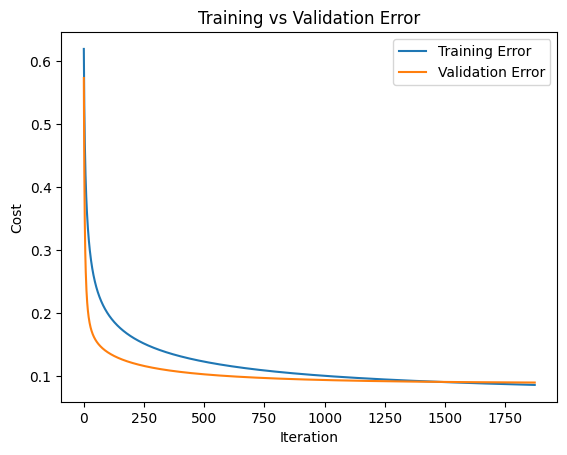

Accuracy: 0.9254689042448174
Precision: 0.843935157108886
Recall: 0.7752868310834866
F1 Score: 0.8081557913196509


In [31]:
accuracy, precision, recall, f1_sc = lr1.fit()

Variance captured by 1 Principal Components is 43.26%
Variance captured by 2 Principal Components is 55.95%
Variance captured by 3 Principal Components is 67.39%
Variance captured by 4 Principal Components is 73.52%
Variance captured by 5 Principal Components is 79.04%
Variance captured by 6 Principal Components is 83.57%
Variance captured by 7 Principal Components is 87.13%
Variance captured by 8 Principal Components is 90.02%
Variance captured by 9 Principal Components is 92.68%
Variance captured by 10 Principal Components is 94.93%
Variance captured by 11 Principal Components is 96.81%
Variance captured by 12 Principal Components is 98.01%
Variance captured by 13 Principal Components is 98.76%
Variance captured by 14 Principal Components is 99.47%
Variance captured by 15 Principal Components is 100.0%


 53%|█████▎    | 1052/2000 [00:03<00:03, 296.26it/s]


Stopped Learning


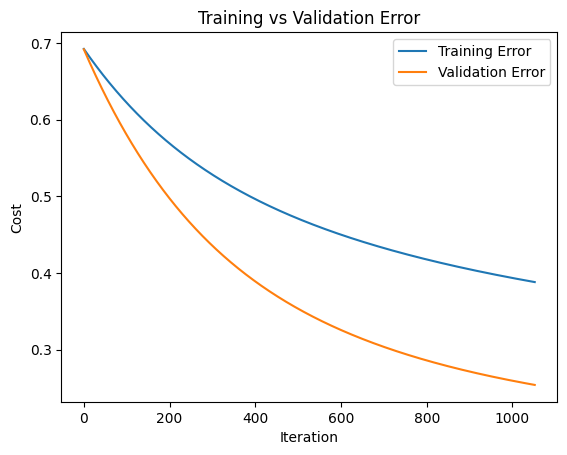

Accuracy: 0.8899308983218164
Precision: 0.71264788094075
Recall: 0.718336810248575
F1 Score: 0.7154810373267025
Variance captured by 1 Principal Components is 43.05%
Variance captured by 2 Principal Components is 54.48%
Variance captured by 3 Principal Components is 65.11%
Variance captured by 4 Principal Components is 72.82%
Variance captured by 5 Principal Components is 78.54%
Variance captured by 6 Principal Components is 83.06%
Variance captured by 7 Principal Components is 87.23%
Variance captured by 8 Principal Components is 90.19%
Variance captured by 9 Principal Components is 92.89%
Variance captured by 10 Principal Components is 94.77%
Variance captured by 11 Principal Components is 96.35%
Variance captured by 12 Principal Components is 97.54%
Variance captured by 13 Principal Components is 98.68%
Variance captured by 14 Principal Components is 99.38%
Variance captured by 15 Principal Components is 100.0%


 54%|█████▍    | 1078/2000 [00:02<00:01, 522.19it/s]


Stopped Learning


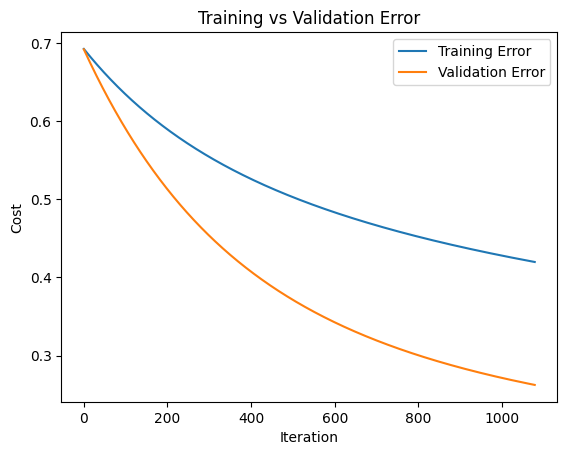

Accuracy: 0.9057255676209279
Precision: 0.7623540086376053
Recall: 0.7554364396999118
F1 Score: 0.7588794602139713
Variance captured by 1 Principal Components is 45.21%
Variance captured by 2 Principal Components is 59.53%
Variance captured by 3 Principal Components is 68.17%
Variance captured by 4 Principal Components is 75.01%
Variance captured by 5 Principal Components is 79.83%
Variance captured by 6 Principal Components is 84.13%
Variance captured by 7 Principal Components is 87.82%
Variance captured by 8 Principal Components is 90.65%
Variance captured by 9 Principal Components is 93.27%
Variance captured by 10 Principal Components is 95.11%
Variance captured by 11 Principal Components is 96.58%
Variance captured by 12 Principal Components is 97.87%
Variance captured by 13 Principal Components is 98.85%
Variance captured by 14 Principal Components is 99.51%
Variance captured by 15 Principal Components is 100.0%


 58%|█████▊    | 1165/2000 [00:02<00:01, 426.42it/s]


Stopped Learning


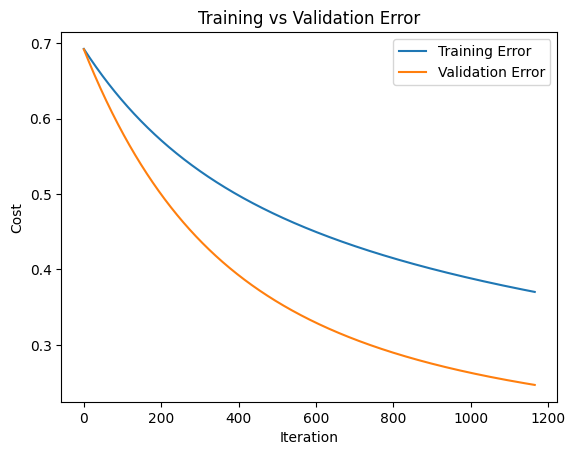

Accuracy: 0.8914116485686081
Precision: 0.7527949686622502
Recall: 0.7243101686229853
F1 Score: 0.7382779152639258
Variance captured by 1 Principal Components is 47.3%
Variance captured by 2 Principal Components is 60.77%
Variance captured by 3 Principal Components is 69.81%
Variance captured by 4 Principal Components is 76.05%
Variance captured by 5 Principal Components is 80.98%
Variance captured by 6 Principal Components is 85.09%
Variance captured by 7 Principal Components is 88.92%
Variance captured by 8 Principal Components is 91.71%
Variance captured by 9 Principal Components is 94.19%
Variance captured by 10 Principal Components is 95.89%
Variance captured by 11 Principal Components is 97.14%
Variance captured by 12 Principal Components is 98.25%
Variance captured by 13 Principal Components is 98.99%
Variance captured by 14 Principal Components is 99.51%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:05<00:00, 334.74it/s]


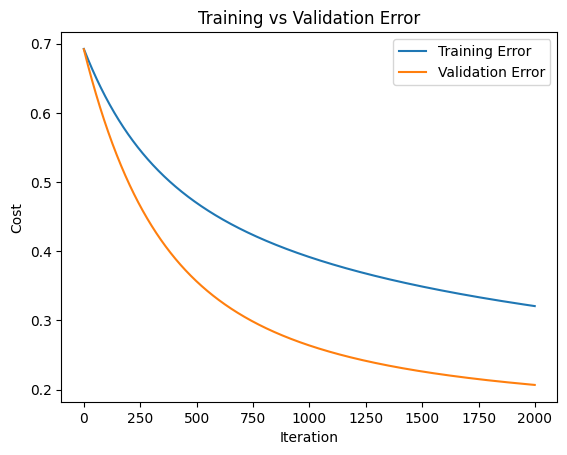

Accuracy: 0.866238894373149
Precision: 0.7232457619170835
Recall: 0.6966227810243122
F1 Score: 0.7096846768462023
Variance captured by 1 Principal Components is 41.43%
Variance captured by 2 Principal Components is 54.11%
Variance captured by 3 Principal Components is 64.64%
Variance captured by 4 Principal Components is 73.32%
Variance captured by 5 Principal Components is 79.38%
Variance captured by 6 Principal Components is 84.17%
Variance captured by 7 Principal Components is 87.94%
Variance captured by 8 Principal Components is 91.22%
Variance captured by 9 Principal Components is 93.78%
Variance captured by 10 Principal Components is 95.43%
Variance captured by 11 Principal Components is 96.83%
Variance captured by 12 Principal Components is 98.07%
Variance captured by 13 Principal Components is 98.8%
Variance captured by 14 Principal Components is 99.46%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 965.04it/s]


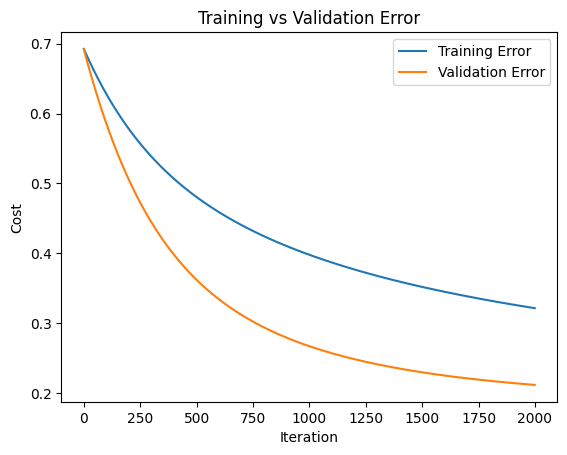

Accuracy: 0.8696939782823297
Precision: 0.7462328099066204
Recall: 0.6534685754814314
F1 Score: 0.6967767501808856
Variance captured by 1 Principal Components is 44.71%
Variance captured by 2 Principal Components is 58.82%
Variance captured by 3 Principal Components is 67.84%
Variance captured by 4 Principal Components is 74.25%
Variance captured by 5 Principal Components is 79.63%
Variance captured by 6 Principal Components is 84.35%
Variance captured by 7 Principal Components is 88.16%
Variance captured by 8 Principal Components is 91.68%
Variance captured by 9 Principal Components is 94.46%
Variance captured by 10 Principal Components is 96.29%
Variance captured by 11 Principal Components is 97.41%
Variance captured by 12 Principal Components is 98.27%
Variance captured by 13 Principal Components is 99.04%
Variance captured by 14 Principal Components is 99.54%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 956.50it/s]


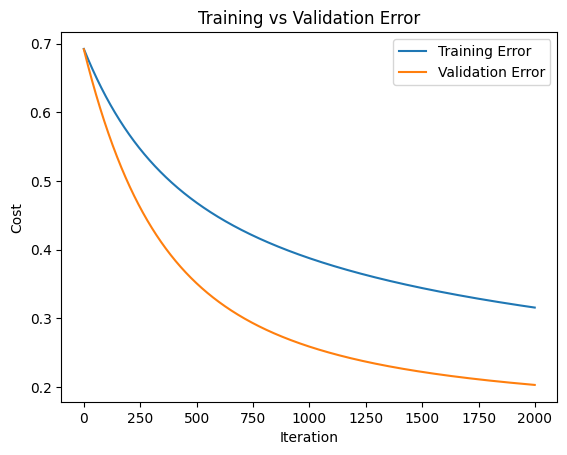

Accuracy: 0.87857847976308
Precision: 0.75972236177767
Recall: 0.6827715996876591
F1 Score: 0.7191944869460637
Variance captured by 1 Principal Components is 42.5%
Variance captured by 2 Principal Components is 54.15%
Variance captured by 3 Principal Components is 64.49%
Variance captured by 4 Principal Components is 71.61%
Variance captured by 5 Principal Components is 78.22%
Variance captured by 6 Principal Components is 82.36%
Variance captured by 7 Principal Components is 86.17%
Variance captured by 8 Principal Components is 89.41%
Variance captured by 9 Principal Components is 92.38%
Variance captured by 10 Principal Components is 94.54%
Variance captured by 11 Principal Components is 96.53%
Variance captured by 12 Principal Components is 97.7%
Variance captured by 13 Principal Components is 98.73%
Variance captured by 14 Principal Components is 99.47%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 960.07it/s]


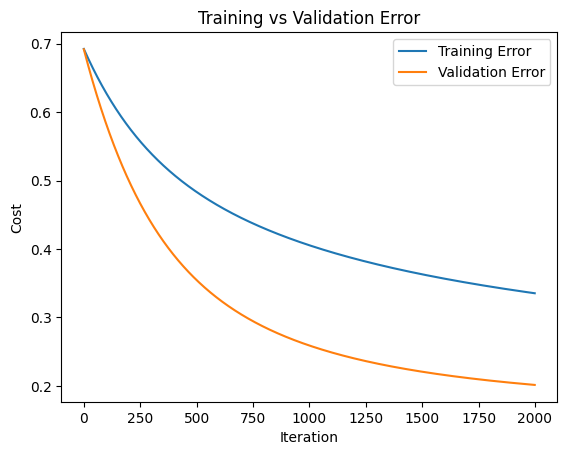

Accuracy: 0.8721618953603159
Precision: 0.7392687011706622
Recall: 0.6508288136101554
F1 Score: 0.6922354246462854
Variance captured by 1 Principal Components is 43.77%
Variance captured by 2 Principal Components is 55.21%
Variance captured by 3 Principal Components is 65.42%
Variance captured by 4 Principal Components is 73.76%
Variance captured by 5 Principal Components is 80.23%
Variance captured by 6 Principal Components is 84.35%
Variance captured by 7 Principal Components is 87.71%
Variance captured by 8 Principal Components is 90.75%
Variance captured by 9 Principal Components is 93.56%
Variance captured by 10 Principal Components is 96.04%
Variance captured by 11 Principal Components is 97.3%
Variance captured by 12 Principal Components is 98.28%
Variance captured by 13 Principal Components is 99.0%
Variance captured by 14 Principal Components is 99.57%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 940.64it/s]


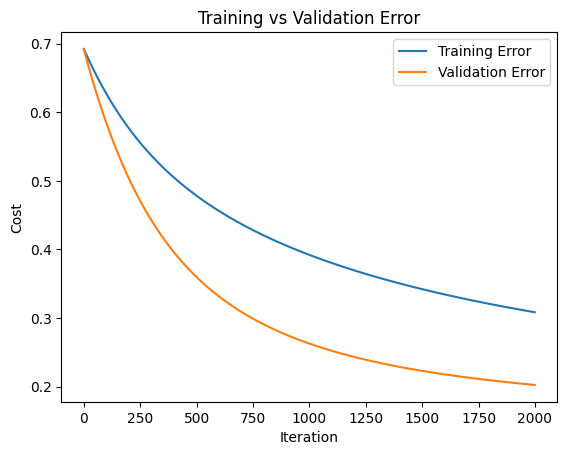

Accuracy: 0.870187561697927
Precision: 0.7364974368118149
Recall: 0.652629568115758
F1 Score: 0.6920317615305716
Variance captured by 1 Principal Components is 42.72%
Variance captured by 2 Principal Components is 56.41%
Variance captured by 3 Principal Components is 67.25%
Variance captured by 4 Principal Components is 73.68%
Variance captured by 5 Principal Components is 79.92%
Variance captured by 6 Principal Components is 84.53%
Variance captured by 7 Principal Components is 87.94%
Variance captured by 8 Principal Components is 90.97%
Variance captured by 9 Principal Components is 93.42%
Variance captured by 10 Principal Components is 95.71%
Variance captured by 11 Principal Components is 97.02%
Variance captured by 12 Principal Components is 98.17%
Variance captured by 13 Principal Components is 98.99%
Variance captured by 14 Principal Components is 99.59%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:03<00:00, 596.51it/s]


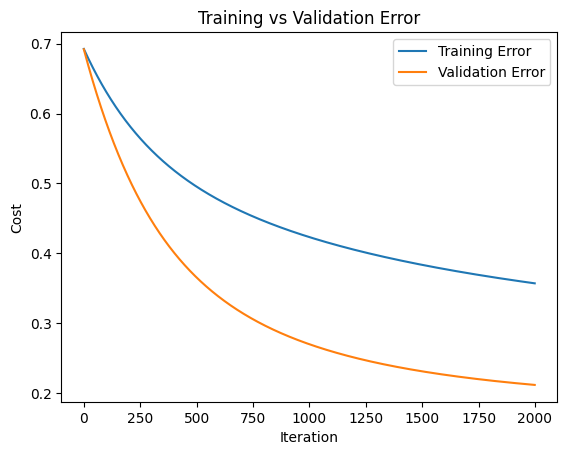

Accuracy: 0.8672260612043435
Precision: 0.743695222043985
Recall: 0.6868926986487051
F1 Score: 0.7141662678021115
Variance captured by 1 Principal Components is 47.38%
Variance captured by 2 Principal Components is 59.3%
Variance captured by 3 Principal Components is 69.35%
Variance captured by 4 Principal Components is 75.65%
Variance captured by 5 Principal Components is 81.21%
Variance captured by 6 Principal Components is 86.3%
Variance captured by 7 Principal Components is 89.9%
Variance captured by 8 Principal Components is 92.67%
Variance captured by 9 Principal Components is 94.58%
Variance captured by 10 Principal Components is 96.29%
Variance captured by 11 Principal Components is 97.4%
Variance captured by 12 Principal Components is 98.18%
Variance captured by 13 Principal Components is 98.89%
Variance captured by 14 Principal Components is 99.56%
Variance captured by 15 Principal Components is 100.0%


 32%|███▏      | 630/2000 [00:01<00:02, 587.34it/s]


Stopped Learning


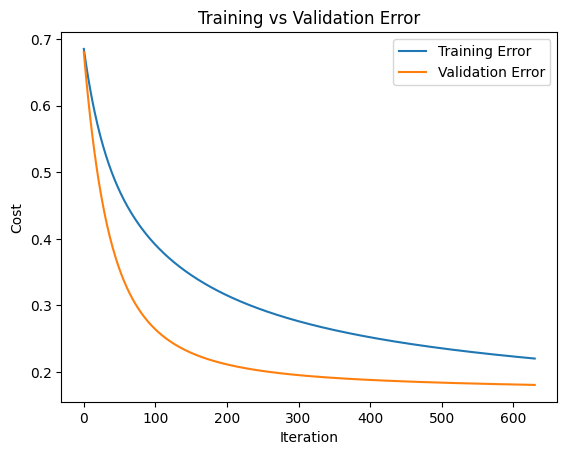

Accuracy: 0.8632773938795657
Precision: 0.7479462958715034
Recall: 0.6430400474365991
F1 Score: 0.6915372302410995
Variance captured by 1 Principal Components is 42.06%
Variance captured by 2 Principal Components is 54.44%
Variance captured by 3 Principal Components is 64.76%
Variance captured by 4 Principal Components is 71.72%
Variance captured by 5 Principal Components is 78.06%
Variance captured by 6 Principal Components is 83.23%
Variance captured by 7 Principal Components is 87.16%
Variance captured by 8 Principal Components is 90.59%
Variance captured by 9 Principal Components is 93.23%
Variance captured by 10 Principal Components is 95.61%
Variance captured by 11 Principal Components is 96.99%
Variance captured by 12 Principal Components is 98.1%
Variance captured by 13 Principal Components is 98.82%
Variance captured by 14 Principal Components is 99.43%
Variance captured by 15 Principal Components is 100.0%


 32%|███▏      | 638/2000 [00:00<00:01, 935.56it/s]


Stopped Learning


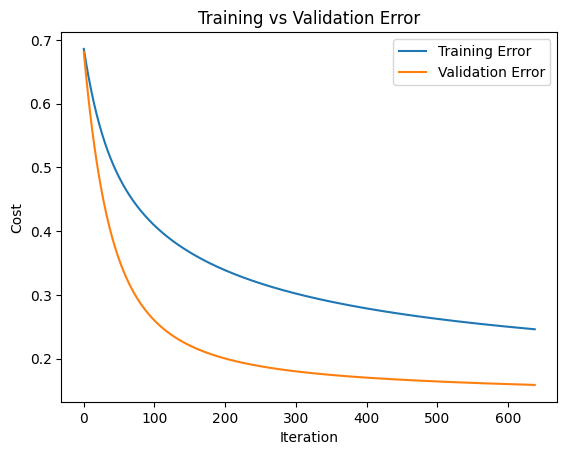

Accuracy: 0.8687068114511353
Precision: 0.7518708294005672
Recall: 0.6635461706262825
F1 Score: 0.7049526883524635
Variance captured by 1 Principal Components is 43.56%
Variance captured by 2 Principal Components is 57.68%
Variance captured by 3 Principal Components is 68.73%
Variance captured by 4 Principal Components is 75.84%
Variance captured by 5 Principal Components is 80.86%
Variance captured by 6 Principal Components is 85.08%
Variance captured by 7 Principal Components is 88.69%
Variance captured by 8 Principal Components is 91.82%
Variance captured by 9 Principal Components is 93.84%
Variance captured by 10 Principal Components is 95.78%
Variance captured by 11 Principal Components is 96.93%
Variance captured by 12 Principal Components is 97.92%
Variance captured by 13 Principal Components is 98.83%
Variance captured by 14 Principal Components is 99.5%
Variance captured by 15 Principal Components is 100.0%


 37%|███▋      | 746/2000 [00:00<00:01, 930.93it/s]


Stopped Learning


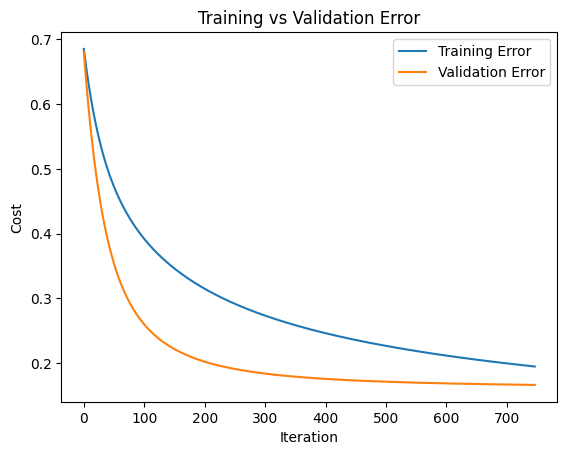

Accuracy: 0.8731490621915103
Precision: 0.7965918889082427
Recall: 0.6908144662886974
F1 Score: 0.739941978415429
Variance captured by 1 Principal Components is 43.62%
Variance captured by 2 Principal Components is 55.91%
Variance captured by 3 Principal Components is 63.97%
Variance captured by 4 Principal Components is 70.8%
Variance captured by 5 Principal Components is 76.43%
Variance captured by 6 Principal Components is 81.54%
Variance captured by 7 Principal Components is 85.7%
Variance captured by 8 Principal Components is 89.52%
Variance captured by 9 Principal Components is 92.5%
Variance captured by 10 Principal Components is 94.68%
Variance captured by 11 Principal Components is 96.76%
Variance captured by 12 Principal Components is 97.95%
Variance captured by 13 Principal Components is 98.92%
Variance captured by 14 Principal Components is 99.54%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 938.16it/s]


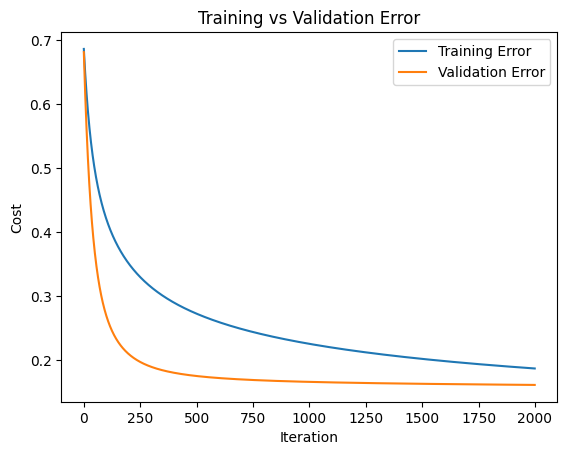

Accuracy: 0.8706811451135242
Precision: 0.7606649115389603
Recall: 0.6513515126694258
F1 Score: 0.7017768805957408
Variance captured by 1 Principal Components is 44.39%
Variance captured by 2 Principal Components is 55.39%
Variance captured by 3 Principal Components is 64.17%
Variance captured by 4 Principal Components is 71.46%
Variance captured by 5 Principal Components is 77.75%
Variance captured by 6 Principal Components is 82.8%
Variance captured by 7 Principal Components is 86.98%
Variance captured by 8 Principal Components is 90.47%
Variance captured by 9 Principal Components is 93.54%
Variance captured by 10 Principal Components is 95.67%
Variance captured by 11 Principal Components is 97.12%
Variance captured by 12 Principal Components is 98.28%
Variance captured by 13 Principal Components is 99.05%
Variance captured by 14 Principal Components is 99.56%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 943.70it/s]


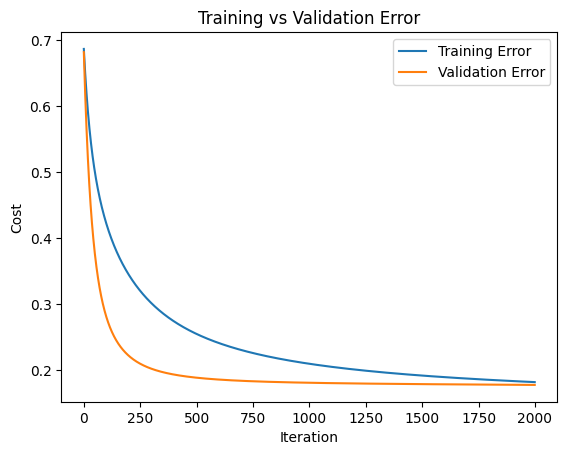

Accuracy: 0.8622902270483712
Precision: 0.7458823322281758
Recall: 0.6385729669669467
F1 Score: 0.6880688660386184
Variance captured by 1 Principal Components is 40.0%
Variance captured by 2 Principal Components is 54.44%
Variance captured by 3 Principal Components is 64.0%
Variance captured by 4 Principal Components is 71.17%
Variance captured by 5 Principal Components is 78.02%
Variance captured by 6 Principal Components is 84.19%
Variance captured by 7 Principal Components is 88.04%
Variance captured by 8 Principal Components is 90.9%
Variance captured by 9 Principal Components is 93.5%
Variance captured by 10 Principal Components is 95.03%
Variance captured by 11 Principal Components is 96.55%
Variance captured by 12 Principal Components is 97.83%
Variance captured by 13 Principal Components is 98.74%
Variance captured by 14 Principal Components is 99.47%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 921.84it/s]


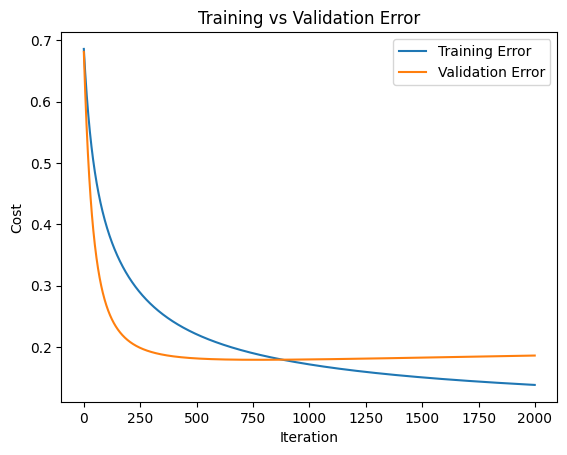

Accuracy: 0.8613030602171767
Precision: 0.7377252770983457
Recall: 0.6345755058444842
F1 Score: 0.6822737357695552
Variance captured by 1 Principal Components is 40.23%
Variance captured by 2 Principal Components is 53.57%
Variance captured by 3 Principal Components is 64.09%
Variance captured by 4 Principal Components is 73.44%
Variance captured by 5 Principal Components is 79.18%
Variance captured by 6 Principal Components is 83.32%
Variance captured by 7 Principal Components is 86.73%
Variance captured by 8 Principal Components is 89.97%
Variance captured by 9 Principal Components is 92.89%
Variance captured by 10 Principal Components is 95.06%
Variance captured by 11 Principal Components is 96.65%
Variance captured by 12 Principal Components is 97.85%
Variance captured by 13 Principal Components is 98.83%
Variance captured by 14 Principal Components is 99.44%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:03<00:00, 571.35it/s]


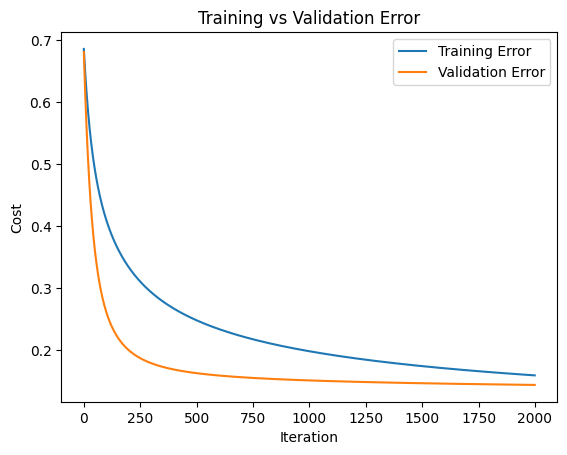

Accuracy: 0.8869693978282329
Precision: 0.8220208010669993
Recall: 0.7054096105966281
F1 Score: 0.7592638836507571
Variance captured by 1 Principal Components is 39.2%
Variance captured by 2 Principal Components is 54.46%
Variance captured by 3 Principal Components is 63.91%
Variance captured by 4 Principal Components is 71.66%
Variance captured by 5 Principal Components is 78.52%
Variance captured by 6 Principal Components is 82.68%
Variance captured by 7 Principal Components is 86.66%
Variance captured by 8 Principal Components is 90.17%
Variance captured by 9 Principal Components is 92.94%
Variance captured by 10 Principal Components is 95.32%
Variance captured by 11 Principal Components is 96.62%
Variance captured by 12 Principal Components is 97.71%
Variance captured by 13 Principal Components is 98.78%
Variance captured by 14 Principal Components is 99.46%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 770.21it/s]


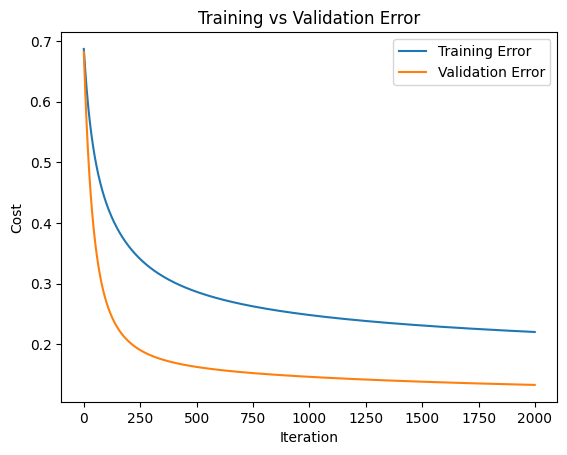

Accuracy: 0.8963474827245804
Precision: 0.8063193212973545
Recall: 0.7160480747356699
F1 Score: 0.7585073079489651
Variance captured by 1 Principal Components is 44.98%
Variance captured by 2 Principal Components is 55.55%
Variance captured by 3 Principal Components is 65.5%
Variance captured by 4 Principal Components is 72.26%
Variance captured by 5 Principal Components is 77.44%
Variance captured by 6 Principal Components is 81.87%
Variance captured by 7 Principal Components is 86.17%
Variance captured by 8 Principal Components is 90.09%
Variance captured by 9 Principal Components is 92.76%
Variance captured by 10 Principal Components is 95.01%
Variance captured by 11 Principal Components is 96.64%
Variance captured by 12 Principal Components is 97.97%
Variance captured by 13 Principal Components is 98.95%
Variance captured by 14 Principal Components is 99.6%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 919.46it/s]


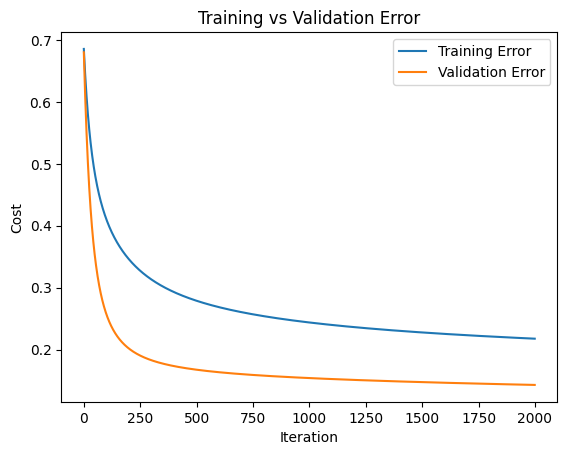

Accuracy: 0.8790720631786771
Precision: 0.7777391202597621
Recall: 0.6790733670974516
F1 Score: 0.725065068705311
Variance captured by 1 Principal Components is 40.01%
Variance captured by 2 Principal Components is 53.18%
Variance captured by 3 Principal Components is 63.48%
Variance captured by 4 Principal Components is 71.15%
Variance captured by 5 Principal Components is 77.86%
Variance captured by 6 Principal Components is 82.97%
Variance captured by 7 Principal Components is 86.63%
Variance captured by 8 Principal Components is 90.21%
Variance captured by 9 Principal Components is 93.45%
Variance captured by 10 Principal Components is 95.5%
Variance captured by 11 Principal Components is 96.91%
Variance captured by 12 Principal Components is 98.01%
Variance captured by 13 Principal Components is 98.88%
Variance captured by 14 Principal Components is 99.54%
Variance captured by 15 Principal Components is 100.0%


 18%|█▊        | 369/2000 [00:00<00:01, 849.22it/s]


Stopped Learning


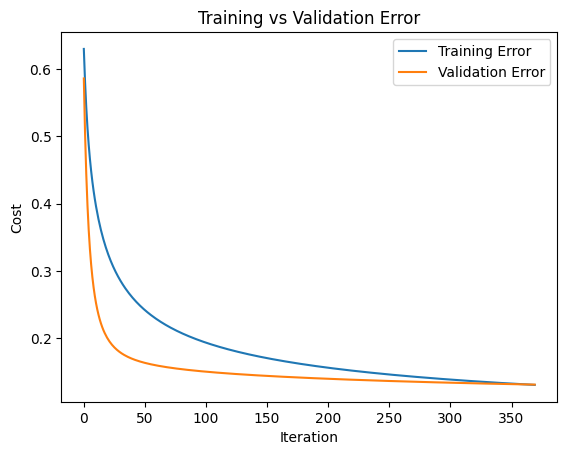

Accuracy: 0.8928923988153998
Precision: 0.8310300616787096
Recall: 0.7170455690444197
F1 Score: 0.7698414879007973
Variance captured by 1 Principal Components is 41.34%
Variance captured by 2 Principal Components is 52.75%
Variance captured by 3 Principal Components is 63.24%
Variance captured by 4 Principal Components is 72.49%
Variance captured by 5 Principal Components is 78.78%
Variance captured by 6 Principal Components is 84.01%
Variance captured by 7 Principal Components is 87.73%
Variance captured by 8 Principal Components is 90.99%
Variance captured by 9 Principal Components is 93.61%
Variance captured by 10 Principal Components is 95.98%
Variance captured by 11 Principal Components is 97.14%
Variance captured by 12 Principal Components is 98.17%
Variance captured by 13 Principal Components is 98.93%
Variance captured by 14 Principal Components is 99.48%
Variance captured by 15 Principal Components is 100.0%


 17%|█▋        | 348/2000 [00:00<00:01, 877.60it/s]


Stopped Learning


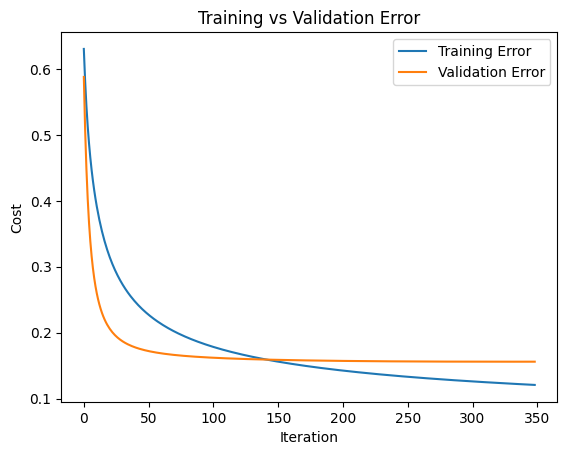

Accuracy: 0.8933859822309971
Precision: 0.8265103575192315
Recall: 0.7140983298471276
F1 Score: 0.7662032166192541
Variance captured by 1 Principal Components is 45.16%
Variance captured by 2 Principal Components is 58.77%
Variance captured by 3 Principal Components is 68.52%
Variance captured by 4 Principal Components is 74.29%
Variance captured by 5 Principal Components is 78.98%
Variance captured by 6 Principal Components is 83.22%
Variance captured by 7 Principal Components is 86.9%
Variance captured by 8 Principal Components is 90.36%
Variance captured by 9 Principal Components is 92.88%
Variance captured by 10 Principal Components is 95.33%
Variance captured by 11 Principal Components is 96.68%
Variance captured by 12 Principal Components is 97.98%
Variance captured by 13 Principal Components is 98.85%
Variance captured by 14 Principal Components is 99.56%
Variance captured by 15 Principal Components is 100.0%


 17%|█▋        | 335/2000 [00:00<00:01, 942.93it/s]


Stopped Learning


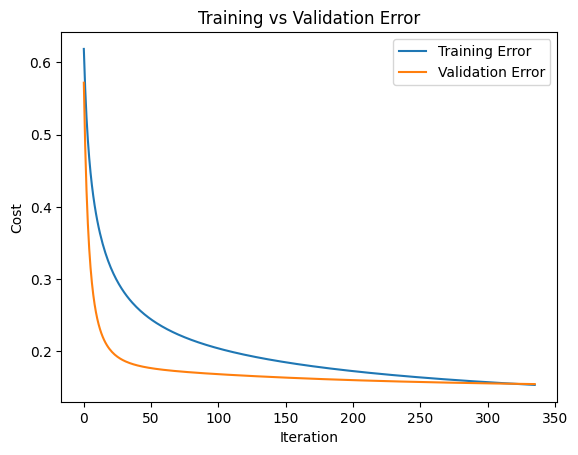

Accuracy: 0.8869693978282329
Precision: 0.8000465014574243
Recall: 0.7090534388681667
F1 Score: 0.751806700079044
Variance captured by 1 Principal Components is 45.52%
Variance captured by 2 Principal Components is 57.47%
Variance captured by 3 Principal Components is 66.52%
Variance captured by 4 Principal Components is 73.57%
Variance captured by 5 Principal Components is 78.97%
Variance captured by 6 Principal Components is 83.84%
Variance captured by 7 Principal Components is 87.93%
Variance captured by 8 Principal Components is 90.91%
Variance captured by 9 Principal Components is 93.69%
Variance captured by 10 Principal Components is 95.83%
Variance captured by 11 Principal Components is 97.39%
Variance captured by 12 Principal Components is 98.41%
Variance captured by 13 Principal Components is 99.17%
Variance captured by 14 Principal Components is 99.77%
Variance captured by 15 Principal Components is 100.0%


 71%|███████   | 1424/2000 [00:01<00:00, 912.16it/s]


Stopped Learning


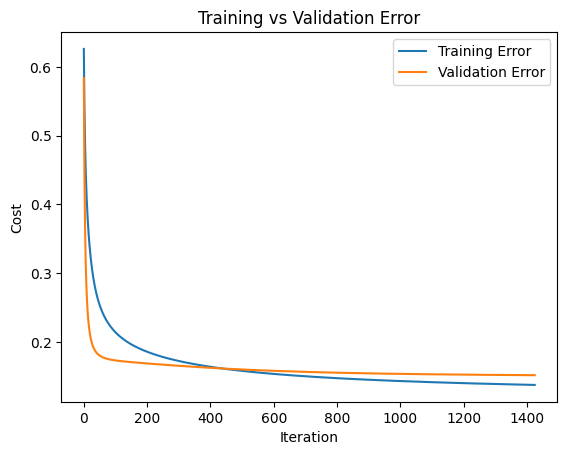

Accuracy: 0.8859822309970385
Precision: 0.7607989833455625
Recall: 0.6573095498493469
F1 Score: 0.705278087766756
Variance captured by 1 Principal Components is 42.96%
Variance captured by 2 Principal Components is 55.13%
Variance captured by 3 Principal Components is 65.66%
Variance captured by 4 Principal Components is 72.24%
Variance captured by 5 Principal Components is 77.83%
Variance captured by 6 Principal Components is 83.13%
Variance captured by 7 Principal Components is 86.82%
Variance captured by 8 Principal Components is 90.08%
Variance captured by 9 Principal Components is 92.76%
Variance captured by 10 Principal Components is 95.29%
Variance captured by 11 Principal Components is 96.67%
Variance captured by 12 Principal Components is 97.82%
Variance captured by 13 Principal Components is 98.84%
Variance captured by 14 Principal Components is 99.47%
Variance captured by 15 Principal Components is 100.0%


 64%|██████▍   | 1284/2000 [00:01<00:00, 912.45it/s]


Stopped Learning


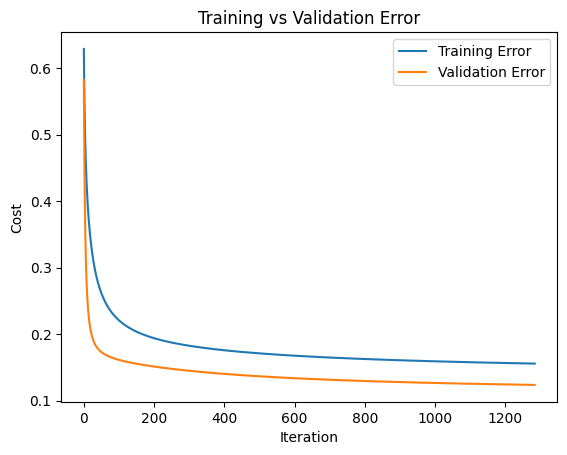

Accuracy: 0.8953603158933859
Precision: 0.7909540368085617
Recall: 0.6894097486109
F1 Score: 0.7366992208938138
Variance captured by 1 Principal Components is 41.59%
Variance captured by 2 Principal Components is 56.04%
Variance captured by 3 Principal Components is 65.7%
Variance captured by 4 Principal Components is 73.35%
Variance captured by 5 Principal Components is 79.25%
Variance captured by 6 Principal Components is 84.1%
Variance captured by 7 Principal Components is 87.73%
Variance captured by 8 Principal Components is 90.61%
Variance captured by 9 Principal Components is 93.07%
Variance captured by 10 Principal Components is 95.24%
Variance captured by 11 Principal Components is 97.03%
Variance captured by 12 Principal Components is 98.11%
Variance captured by 13 Principal Components is 98.95%
Variance captured by 14 Principal Components is 99.58%
Variance captured by 15 Principal Components is 100.0%


 53%|█████▎    | 1056/2000 [00:01<00:01, 554.59it/s]


Stopped Learning


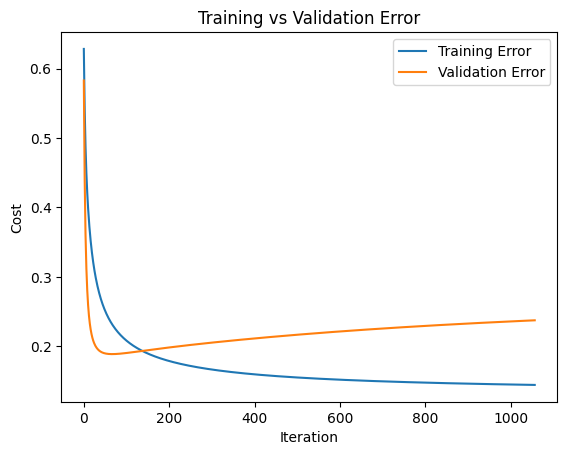

Accuracy: 0.8731490621915103
Precision: 0.7442801377828386
Recall: 0.6293742178021076
F1 Score: 0.6820212488508378
Variance captured by 1 Principal Components is 50.27%
Variance captured by 2 Principal Components is 62.38%
Variance captured by 3 Principal Components is 70.77%
Variance captured by 4 Principal Components is 76.51%
Variance captured by 5 Principal Components is 81.56%
Variance captured by 6 Principal Components is 85.79%
Variance captured by 7 Principal Components is 89.19%
Variance captured by 8 Principal Components is 92.15%
Variance captured by 9 Principal Components is 94.54%
Variance captured by 10 Principal Components is 96.3%
Variance captured by 11 Principal Components is 97.42%
Variance captured by 12 Principal Components is 98.39%
Variance captured by 13 Principal Components is 98.99%
Variance captured by 14 Principal Components is 99.54%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:03<00:00, 655.71it/s]


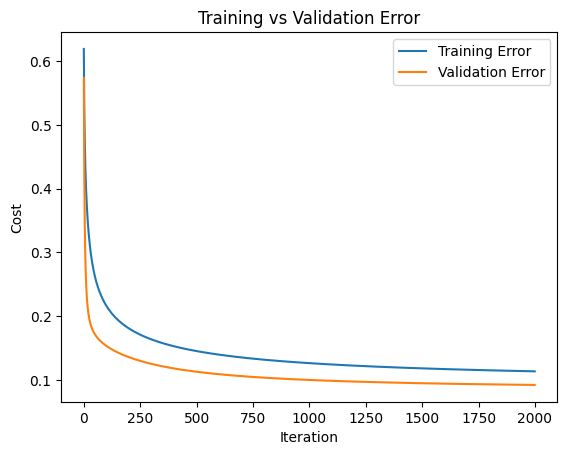

Accuracy: 0.9259624876604146
Precision: 0.8369472203571915
Recall: 0.762225708041012
F1 Score: 0.7978407791941632
Variance captured by 1 Principal Components is 42.99%
Variance captured by 2 Principal Components is 56.72%
Variance captured by 3 Principal Components is 66.36%
Variance captured by 4 Principal Components is 72.48%
Variance captured by 5 Principal Components is 77.89%
Variance captured by 6 Principal Components is 82.76%
Variance captured by 7 Principal Components is 86.51%
Variance captured by 8 Principal Components is 89.84%
Variance captured by 9 Principal Components is 92.54%
Variance captured by 10 Principal Components is 94.61%
Variance captured by 11 Principal Components is 96.55%
Variance captured by 12 Principal Components is 98.0%
Variance captured by 13 Principal Components is 98.83%
Variance captured by 14 Principal Components is 99.5%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 910.18it/s]


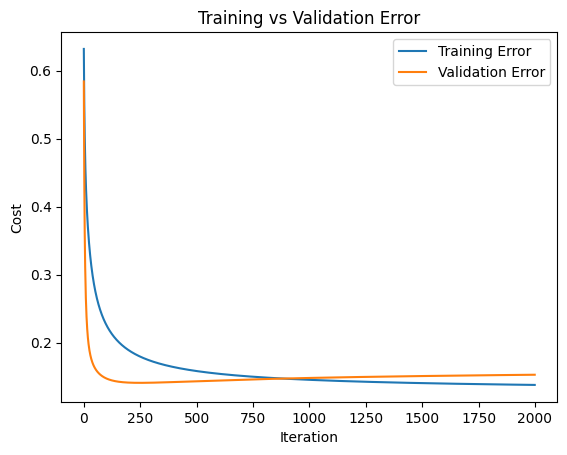

Accuracy: 0.9052319842053307
Precision: 0.7992307796354572
Recall: 0.7046585395621401
F1 Score: 0.7489710669020777
Variance captured by 1 Principal Components is 41.4%
Variance captured by 2 Principal Components is 53.25%
Variance captured by 3 Principal Components is 62.82%
Variance captured by 4 Principal Components is 71.25%
Variance captured by 5 Principal Components is 77.43%
Variance captured by 6 Principal Components is 82.23%
Variance captured by 7 Principal Components is 86.52%
Variance captured by 8 Principal Components is 90.12%
Variance captured by 9 Principal Components is 92.72%
Variance captured by 10 Principal Components is 95.0%
Variance captured by 11 Principal Components is 96.64%
Variance captured by 12 Principal Components is 97.68%
Variance captured by 13 Principal Components is 98.66%
Variance captured by 14 Principal Components is 99.41%
Variance captured by 15 Principal Components is 100.0%


100%|██████████| 2000/2000 [00:02<00:00, 904.44it/s]


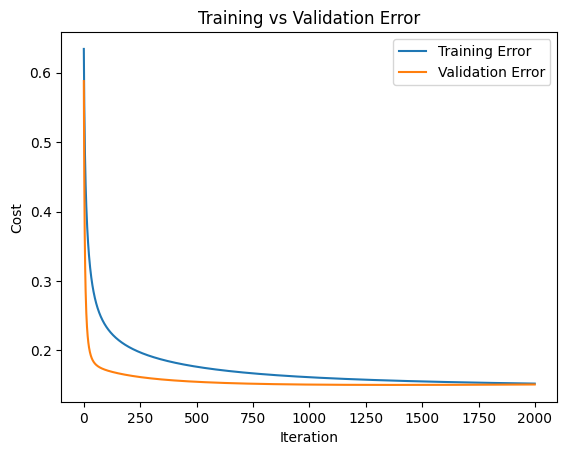

Accuracy: 0.8998025666337611
Precision: 0.7886150698944456
Recall: 0.6981366143479465
F1 Score: 0.740622742526676


In [32]:
# Initializing range of values for learning rate, tolerance and regularization parameter
learning_rate = [0.001,0.01,0.1]
epsilon = [0.0001,0.00001,0.000001]
reg_param = [0.01,0.1,1]

# Creating empty dictionary to store values
results_dict = {'Learning Rate': [], 'Tolerance': [], 'Reg. Parameter': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Iterating through all hyperparameter values and running Logistic Regression with PCA for each combination
for i in learning_rate:
  for j in epsilon:
    for k in reg_param:
      lr = LogisticRegression(df1, 'Room_Occupancy_Count', learning_rate=i, max_iteration=2000, epsilon=j, regularization_parameter=k, num_pcas=8)
      accuracy, precision, recall, f1_sc = lr.fit()
      results_dict['Learning Rate'].append(i)
      results_dict['Tolerance'].append(j)
      results_dict['Reg. Parameter'].append(k)
      results_dict['Accuracy'].append(accuracy)
      results_dict['Precision'].append(precision)
      results_dict['Recall'].append(recall)
      results_dict['F1 Score'].append(f1_sc)

# Creating dataframe of the results
LR_pca_df = pd.DataFrame(results_dict)

In [33]:
# Converting evaluation scores to % and rounding off
LR_pca_df['Accuracy'] = round(LR_pca_df['Accuracy']*100,2)
LR_pca_df['Precision'] = round(LR_pca_df['Precision']*100,2)
LR_pca_df['Recall'] = round(LR_pca_df['Recall']*100,2)
LR_pca_df['F1 Score'] = round(LR_pca_df['F1 Score']*100,2)

In [34]:
# Displaying final results sorted by Precision score
LR_pca_df.sort_values('Precision',ascending=False)

,Learning Rate,Tolerance,Reg. Parameter,Accuracy,Precision,Recall,F1 Score
24,0.100,0.000001,0.01,92.60,83.69,76.22,79.78
18,0.100,0.000100,0.01,89.29,83.10,71.70,76.98
19,0.100,0.000100,0.10,89.34,82.65,71.41,76.62
15,0.010,0.000001,0.01,88.70,82.20,70.54,75.93
16,0.010,0.000001,0.10,89.63,80.63,71.60,75.85
20,0.100,0.000100,1.00,88.70,80.00,70.91,75.18
25,0.100,0.000001,0.10,90.52,79.92,70.47,74.90
11,0.010,0.000100,1.00,87.31,79.66,69.08,73.99
22,0.100,0.000010,0.10,89.54,79.10,68.94,73.67
26,0.100,0.000001,1.00,89.98,78.86,69.81,74.06


## Logistic Regression without PCA

In [35]:
lr = LogisticRegression(df1, 'Room_Occupancy_Count', learning_rate=0.01, max_iteration=2000, epsilon=0.00001, regularization_parameter=0.1,num_pcas=None)

100%|██████████| 2000/2000 [00:02<00:00, 916.67it/s]


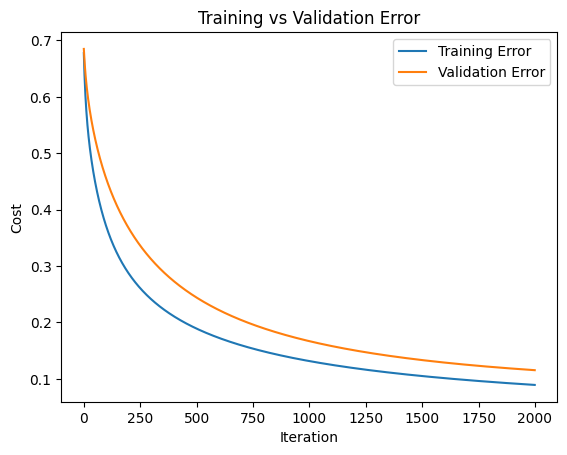

Accuracy: 0.9496544916090819
Precision: 0.8519809854449532
Recall: 0.8159948569733391
F1 Score: 0.8335997257061172


In [36]:
accuracy, precision, recall, f1_sc = lr.fit()

 57%|█████▋    | 1135/2000 [00:01<00:01, 829.78it/s]


Stopped Learning


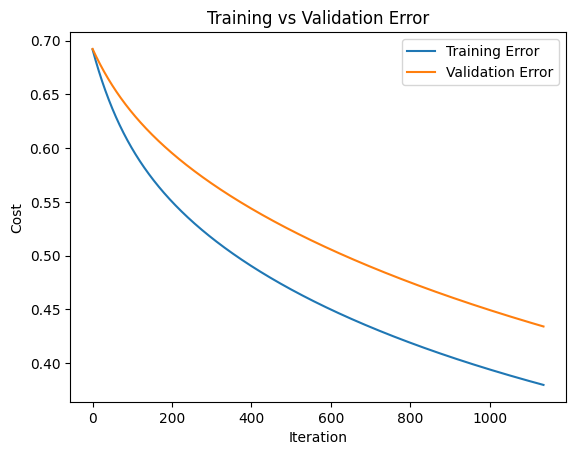

Accuracy: 0.8351431391905232
Precision: 0.7777768625651298
Recall: 0.6464239238979312
F1 Score: 0.706043103184894


 61%|██████    | 1211/2000 [00:02<00:01, 544.47it/s]


Stopped Learning


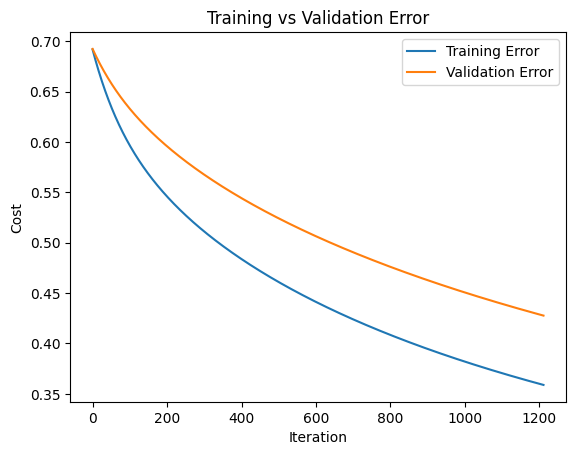

Accuracy: 0.8381046396841066
Precision: 0.7816662321387864
Recall: 0.6545846435196292
F1 Score: 0.7125032549502712


 64%|██████▍   | 1286/2000 [00:01<00:00, 739.55it/s]


Stopped Learning


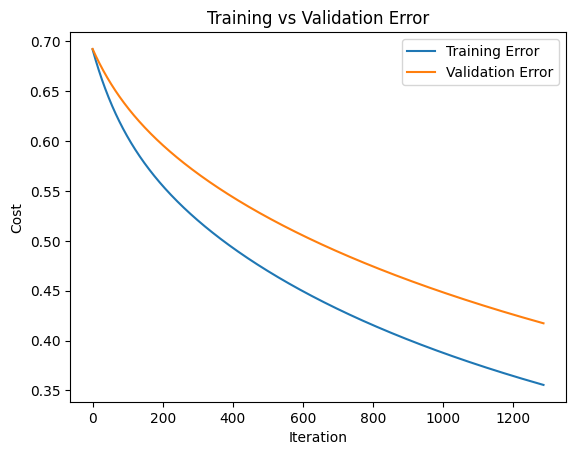

Accuracy: 0.8440276406712734
Precision: 0.8067404937191898
Recall: 0.6811135846418115
F1 Score: 0.7386233872586263


100%|██████████| 2000/2000 [00:02<00:00, 941.66it/s]


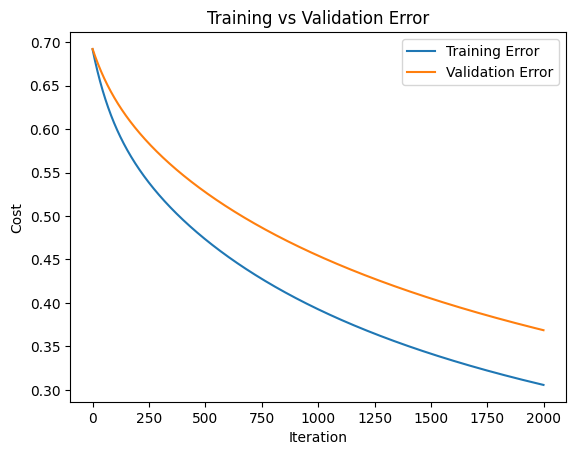

Accuracy: 0.8292201382033564
Precision: 0.7796295829351911
Recall: 0.6194277211466102
F1 Score: 0.6903565343422009


100%|██████████| 2000/2000 [00:02<00:00, 929.14it/s]


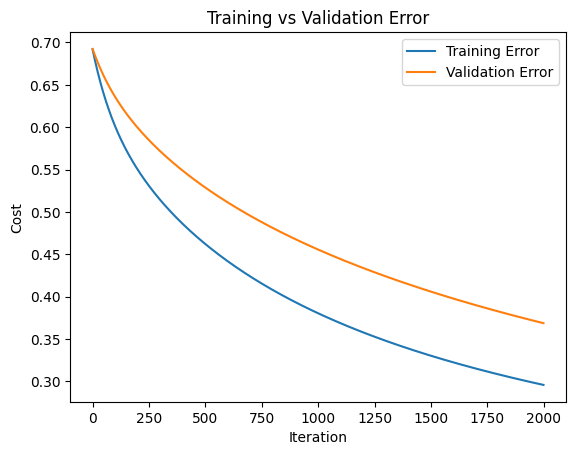

Accuracy: 0.8390918065153011
Precision: 0.7959613811889235
Recall: 0.6354524736235242
F1 Score: 0.7067077447724867


100%|██████████| 2000/2000 [00:02<00:00, 922.77it/s]


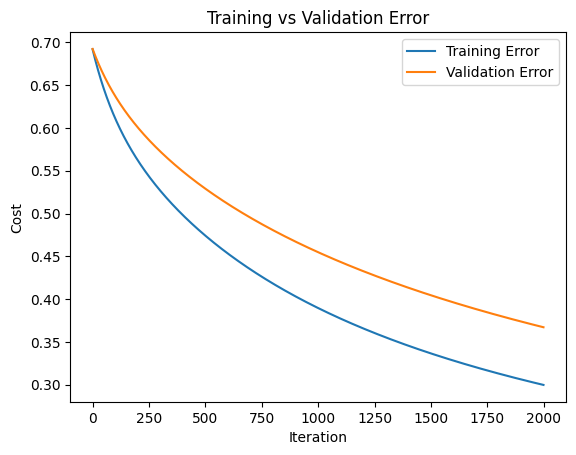

Accuracy: 0.8366238894373149
Precision: 0.7548799810982348
Recall: 0.6254785280535253
F1 Score: 0.6841138969390543


100%|██████████| 2000/2000 [00:02<00:00, 716.07it/s]


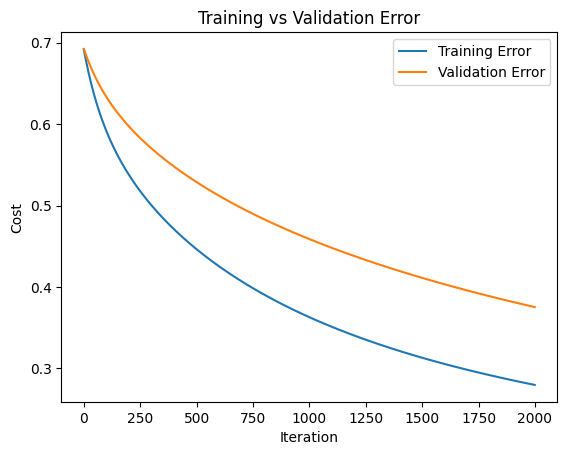

Accuracy: 0.8237907206317868
Precision: 0.7215016080473461
Recall: 0.5912908376694959
F1 Score: 0.6499386732367307


100%|██████████| 2000/2000 [00:03<00:00, 609.30it/s]


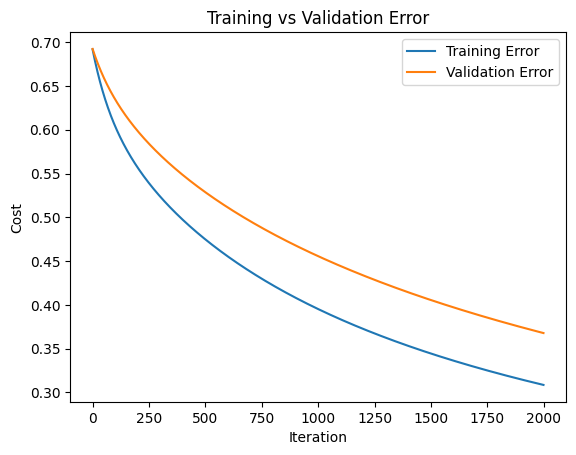

Accuracy: 0.8395853899308984
Precision: 0.7657920568067956
Recall: 0.6385374493927125
F1 Score: 0.6963991065628751


100%|██████████| 2000/2000 [00:02<00:00, 915.73it/s]


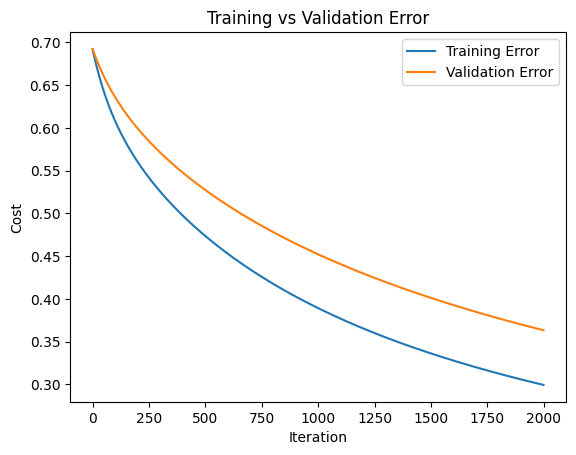

Accuracy: 0.8667324777887463
Precision: 0.8429746054494202
Recall: 0.7257010307360594
F1 Score: 0.7799541548902267


 41%|████      | 823/2000 [00:00<00:01, 882.86it/s]


Stopped Learning


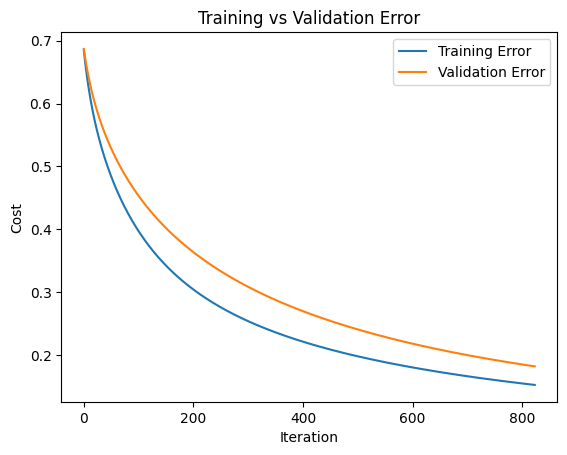

Accuracy: 0.9190523198420533
Precision: 0.8655005927172681
Recall: 0.7534777907058449
F1 Score: 0.8056135661013005


 42%|████▏     | 835/2000 [00:01<00:01, 698.30it/s]


Stopped Learning


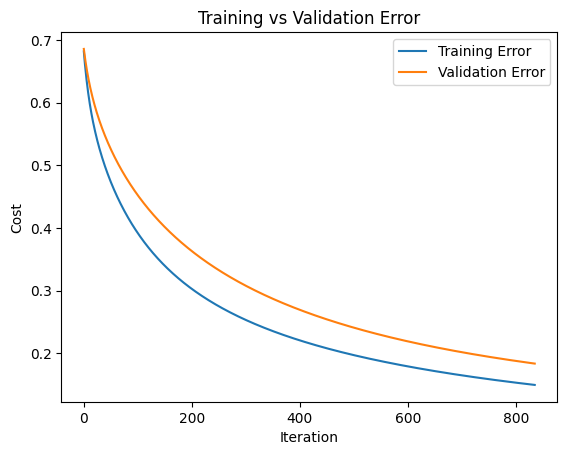

Accuracy: 0.9047384007897334
Precision: 0.805876428592722
Recall: 0.6978467152402118
F1 Score: 0.7479810640534043


 39%|███▉      | 780/2000 [00:00<00:01, 914.05it/s]


Stopped Learning


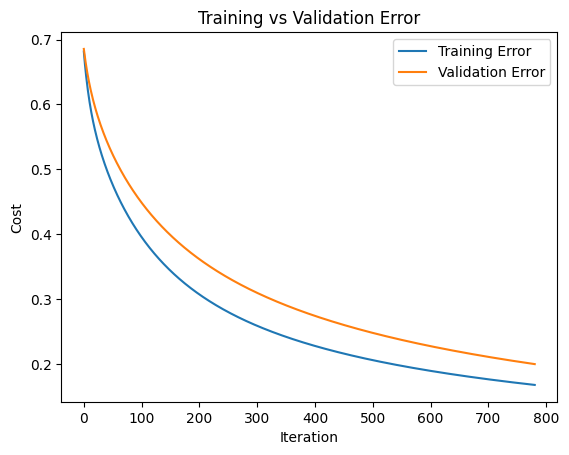

Accuracy: 0.8825271470878578
Precision: 0.8146202486100607
Recall: 0.6825569673637492
F1 Score: 0.7427640769736547


100%|██████████| 2000/2000 [00:02<00:00, 867.62it/s]


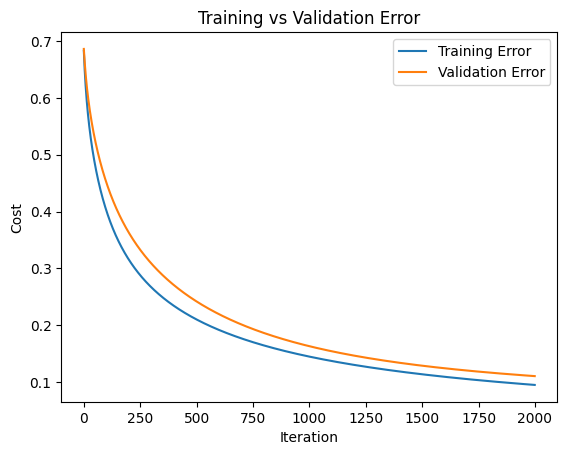

Accuracy: 0.9580454096742349
Precision: 0.8862462249532168
Recall: 0.8478786101335121
F1 Score: 0.8666379746667132


100%|██████████| 2000/2000 [00:03<00:00, 551.66it/s]


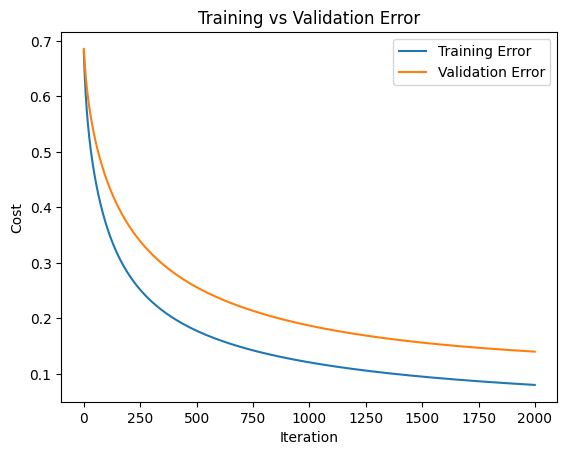

Accuracy: 0.9363277393879565
Precision: 0.8247491823628688
Recall: 0.7674182955436305
F1 Score: 0.7950515515015244


100%|██████████| 2000/2000 [00:02<00:00, 841.65it/s]


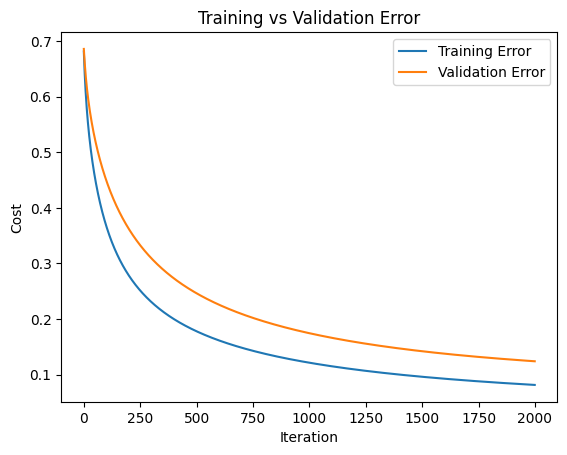

Accuracy: 0.9461994076999013
Precision: 0.8668584993047584
Recall: 0.8062765569433804
F1 Score: 0.8354707332997151


100%|██████████| 2000/2000 [00:02<00:00, 884.68it/s]


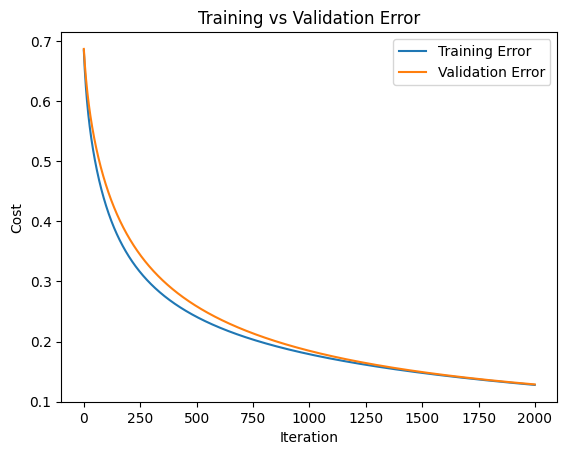

Accuracy: 0.9407699901283317
Precision: 0.871895202407394
Recall: 0.790076166121863
F1 Score: 0.8289717041126669


100%|██████████| 2000/2000 [00:02<00:00, 878.14it/s]


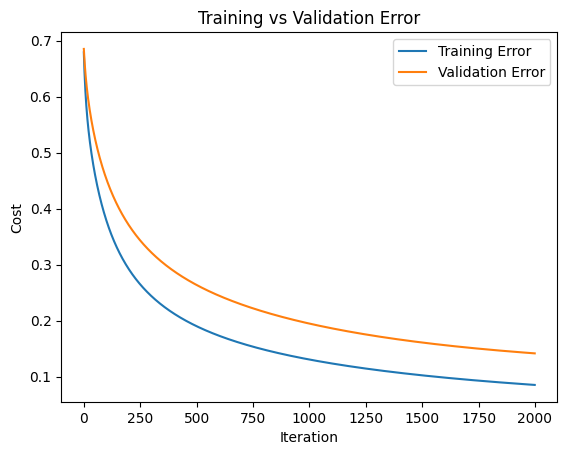

Accuracy: 0.9338598223099703
Precision: 0.8270417035857642
Recall: 0.7639766345631918
F1 Score: 0.7942592768402221


100%|██████████| 2000/2000 [00:02<00:00, 876.88it/s]


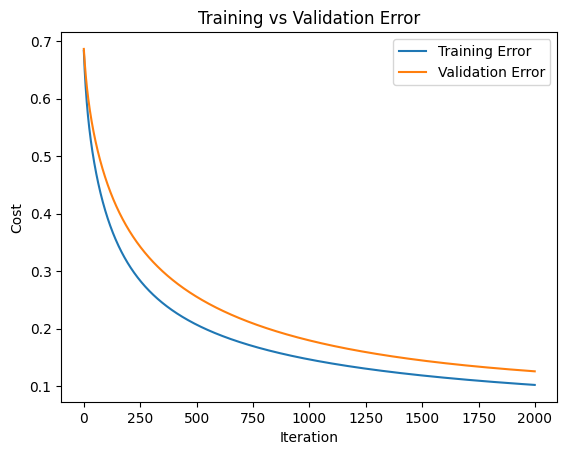

Accuracy: 0.9387956564659428
Precision: 0.8295298023700064
Recall: 0.7771685444843408
F1 Score: 0.8024959636965677


 20%|█▉        | 393/2000 [00:00<00:02, 541.75it/s]


Stopped Learning


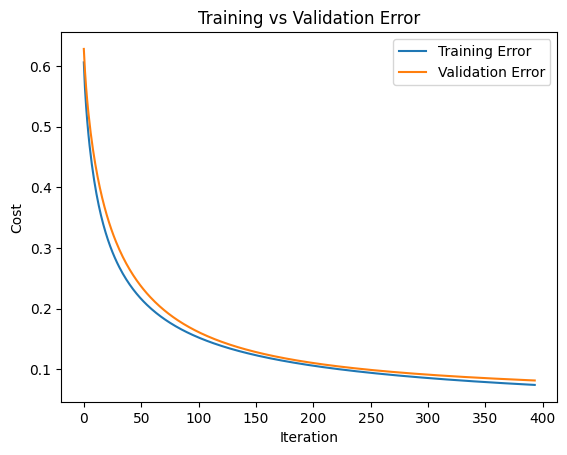

Accuracy: 0.9644619940769991
Precision: 0.8969369327456316
Recall: 0.8741542183883864
F1 Score: 0.8853990410215816


 20%|██        | 404/2000 [00:00<00:03, 519.28it/s]


Stopped Learning


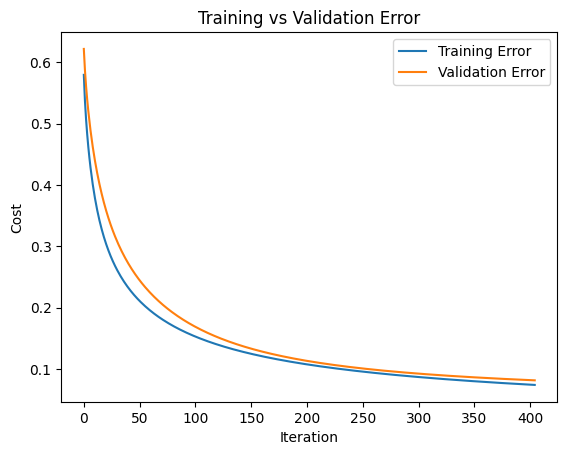

Accuracy: 0.9674234945705824
Precision: 0.9146338918166356
Recall: 0.8833500539829654
F1 Score: 0.8987198129308837


 18%|█▊        | 355/2000 [00:00<00:03, 507.28it/s]


Stopped Learning


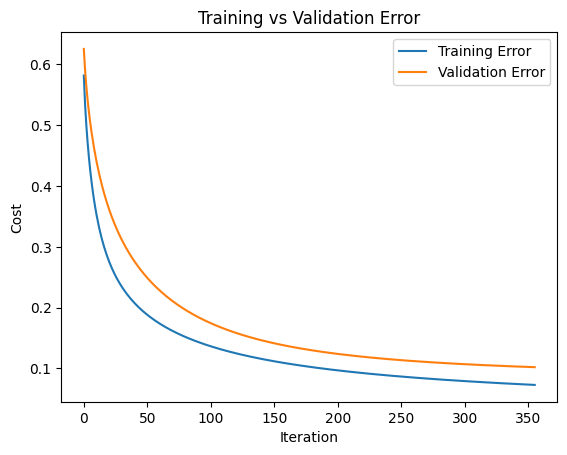

Accuracy: 0.9555774925962488
Precision: 0.8734430104558171
Recall: 0.835871439740253
F1 Score: 0.8542443043139532


 94%|█████████▎| 1871/2000 [00:02<00:00, 777.79it/s]


Stopped Learning


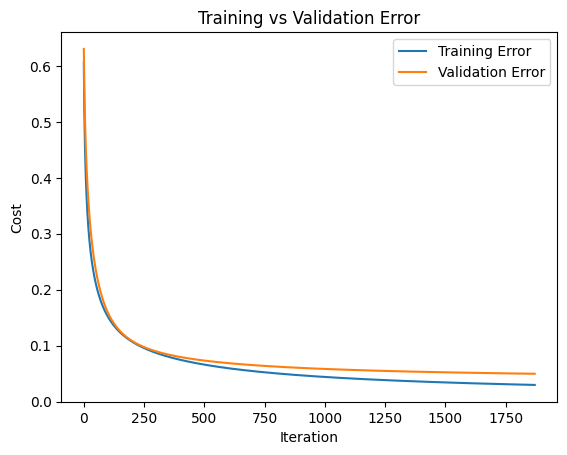

Accuracy: 0.9802566633761106
Precision: 0.9474988065522205
Recall: 0.9277699383917777
F1 Score: 0.9375305931497175


 81%|████████▏ | 1628/2000 [00:01<00:00, 869.06it/s]


Stopped Learning


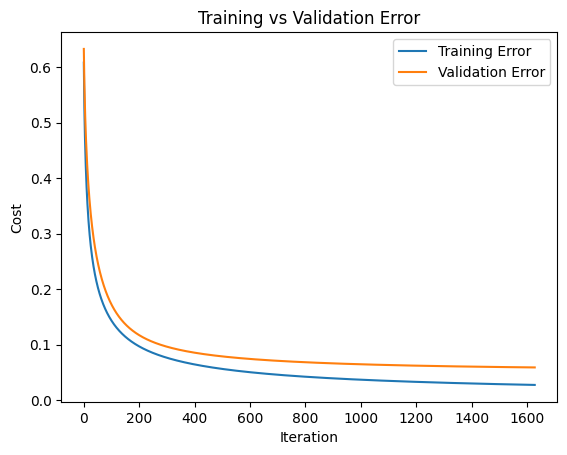

Accuracy: 0.9708785784797631
Precision: 0.90987786234597
Recall: 0.901309682187731
F1 Score: 0.9055735055331691


 74%|███████▎  | 1472/2000 [00:01<00:00, 856.23it/s]


Stopped Learning


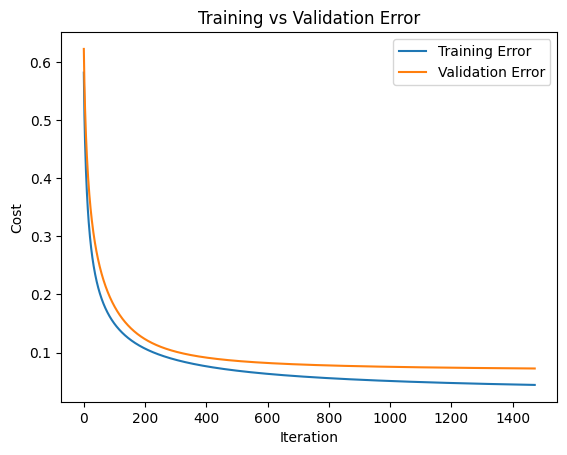

Accuracy: 0.9649555774925962
Precision: 0.9002614628921195
Recall: 0.8706834385428153
F1 Score: 0.8852254471196426


100%|██████████| 2000/2000 [00:02<00:00, 841.98it/s]


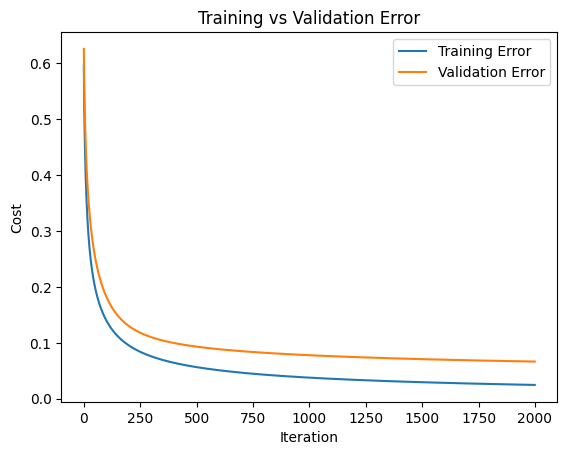

Accuracy: 0.9664363277393879
Precision: 0.8987083087491207
Recall: 0.8724398578208978
F1 Score: 0.8853792854902249


100%|██████████| 2000/2000 [00:03<00:00, 553.94it/s]


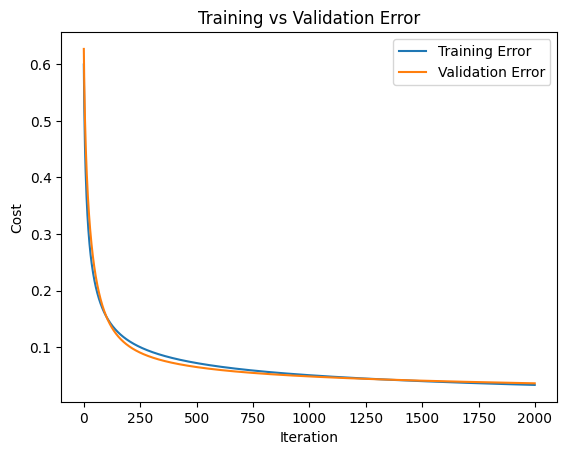

Accuracy: 0.9846989141164857
Precision: 0.9541679165332221
Recall: 0.9501961408188064
F1 Score: 0.9521778868728058


100%|██████████| 2000/2000 [00:02<00:00, 684.09it/s]


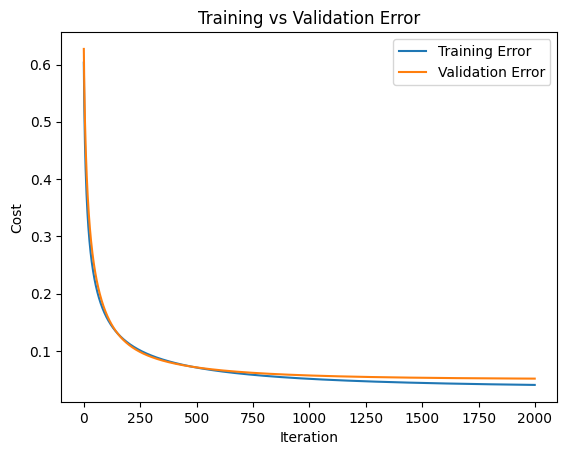

Accuracy: 0.9792694965449161
Precision: 0.9414532902696737
Recall: 0.925441215389669
F1 Score: 0.9333785862442843


In [37]:
# Initializing range of values for learning rate, tolerance and regularization parameter
learning_rate = [0.001,0.01,0.1]
epsilon = [0.0001,0.00001,0.000001]
reg_param = [0.01,0.1,1]

# Creating empty dictionary to store values
results_dict = {'Learning Rate': [], 'Tolerance': [], 'Reg. Parameter': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Iterating through all hyperparameter values and running Logistic Regression for each combination
for i in learning_rate:
  for j in epsilon:
    for k in reg_param:
      lr = LogisticRegression(df1, 'Room_Occupancy_Count', learning_rate=i, max_iteration=2000, epsilon=j, regularization_parameter=k, num_pcas=None)
      accuracy, precision, recall, f1_sc = lr.fit()
      results_dict['Learning Rate'].append(i)
      results_dict['Tolerance'].append(j)
      results_dict['Reg. Parameter'].append(k)
      results_dict['Accuracy'].append(accuracy)
      results_dict['Precision'].append(precision)
      results_dict['Recall'].append(recall)
      results_dict['F1 Score'].append(f1_sc)

# Creating dataframe of the results
LR_df = pd.DataFrame(results_dict)

In [38]:
# Converting evaluation scores to % and rounding off
LR_df['Accuracy'] = round(LR_df['Accuracy']*100,2)
LR_df['Precision'] = round(LR_df['Precision']*100,2)
LR_df['Recall'] = round(LR_df['Recall']*100,2)
LR_df['F1 Score'] = round(LR_df['F1 Score']*100,2)

In [39]:
# Displaying final results sorted by Precision score
LR_df.sort_values('Precision',ascending=False)

,Learning Rate,Tolerance,Reg. Parameter,Accuracy,Precision,Recall,F1 Score
25,0.100,0.000001,0.10,98.47,95.42,95.02,95.22
21,0.100,0.000010,0.01,98.03,94.75,92.78,93.75
26,0.100,0.000001,1.00,97.93,94.15,92.54,93.34
19,0.100,0.000100,0.10,96.74,91.46,88.34,89.87
22,0.100,0.000010,0.10,97.09,90.99,90.13,90.56
23,0.100,0.000010,1.00,96.50,90.03,87.07,88.52
24,0.100,0.000001,0.01,96.64,89.87,87.24,88.54
18,0.100,0.000100,0.01,96.45,89.69,87.42,88.54
12,0.010,0.000010,0.01,95.80,88.62,84.79,86.66
20,0.100,0.000100,1.00,95.56,87.34,83.59,85.42


#Feedforward Neural Network

In [40]:
import tensorflow as tf
y = df1['Room_Occupancy_Count']
X = df1.loc[:, df1.columns!='Room_Occupancy_Count']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.1,
                                                  random_state= 0, stratify= y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,
                                                  test_size = 0.2,
                                                  random_state= 0,
                                                  stratify= y_temp)

X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)

In [41]:
def NN_Model(lr, reg_para, act_fn):

    tf.random.set_seed(42)
    # Defining a deep fully connected neural network model
    model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(X_train.shape[1], input_dim = X_train.shape[1], activation=act_fn, kernel_regularizer=tf.keras.regularizers.l2(reg_para)),
    tf.keras.layers.Dense(15, activation=act_fn, kernel_regularizer=tf.keras.regularizers.l2(reg_para)),
    tf.keras.layers.Dense(4, activation='softmax')
      ])


    # Compiling the model
    model_nn.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


    # Printing model summary
    # model_nn.summary()

    history = model_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data = (X_val, y_val), shuffle = True)

    # Evaluating the model on the test set
    test_loss, test_accuracy = model_nn.evaluate(X_test, y_test, batch_size=32)

    # Predicting the classes for the test set
    y_pred_probs = model_nn.predict(X_test)

    # Obtaining the predicted class labels by selecting the class with the highest probability
    y_pred = y_pred_probs.argmax(axis=1)

    # Calculating precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    print(report)

    return history, test_accuracy, precision, recall, f1

In [42]:
#Evaluating performance of the model - for each combination of hyperparameters
lr_values = [0.01,0.001,0.0001]
reg_para_values = [0.01,0.001,0.005]
act_fns = ['relu', 'sigmoid', 'tanh', 'LeakyReLU']

#Running the model with evaluation added to dataframe
df_acc = pd.DataFrame()
for lr in lr_values:
  for reg_para in reg_para_values:
    for act_fn in act_fns:
      print(f' Learning rate: {lr} | Regularisation parameter: {reg_para} | Activation function: {act_fn}')
      history , test_acc, precision, recall, f1_ = NN_Model(lr,reg_para,act_fn)

      df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,
                              'precision': precision, 'recall': recall, 'F1-score': f1_}, ignore_index=True)


 Learning rate: 0.01 | Regularisation parameter: 0.01 | Activation function: relu
Epoch 1/20
228/228 [==============================] - 1s 3ms/step - loss: 1.2102 - accuracy: 0.9287 - val_loss: 0.3026 - val_accuracy: 0.9320
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2635 - accuracy: 0.9635 - val_loss: 0.3348 - val_accuracy: 0.9720
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.9665 - val_loss: 0.1624 - val_accuracy: 0.9622
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1708 - accuracy: 0.9715 - val_loss: 0.1558 - val_accuracy: 0.9720
Epoch 5/20
228/228 [==============================] - 1s 2ms/step - loss: 0.1695 - accuracy: 0.9728 - val_loss: 0.1849 - val_accuracy: 0.9698
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1465 - accuracy: 0.9734 - val_loss: 0.1427 - val_accuracy: 0.9677
Epoch 7/20
228/228 [==============================] - 1s 3ms/step 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.8666 - val_loss: 0.3430 - val_accuracy: 0.8860
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8834 - val_loss: 0.3317 - val_accuracy: 0.8569
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8797 - val_loss: 0.3777 - val_accuracy: 0.8860
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8834 - val_loss: 0.3417 - val_accuracy: 0.8860
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8821 - val_loss: 0.3689 - val_accuracy: 0.8860
Epoch 6/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8832 - val_loss: 0.3307 - val_accuracy: 0.8860
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3249 - accuracy: 0.8860 - val_loss: 0.3181 - val_accuracy: 0.8860
Epoch 8/20
228/22

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Epoch 1/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3919 - accuracy: 0.8797 - val_loss: 0.2971 - val_accuracy: 0.9068
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3205 - accuracy: 0.8896 - val_loss: 0.3412 - val_accuracy: 0.8569
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.8799 - val_loss: 0.3090 - val_accuracy: 0.8624
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3099 - accuracy: 0.8797 - val_loss: 0.3111 - val_accuracy: 0.8860
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3056 - accuracy: 0.8826 - val_loss: 0.2986 - val_accuracy: 0.8860
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3724 - accuracy: 0.8740 - val_loss: 0.7770 - val_accuracy: 0.8125
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.7152 - accuracy: 0.8123 - val_loss: 0.7017 - val_accuracy: 0.8125
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Epoch 1/20
228/228 [==============================] - 2s 5ms/step - loss: 1.0019 - accuracy: 0.9428 - val_loss: 0.5246 - val_accuracy: 0.9720
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.9604 - val_loss: 0.3688 - val_accuracy: 0.9709
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3145 - accuracy: 0.9691 - val_loss: 0.4087 - val_accuracy: 0.9698
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2927 - accuracy: 0.9656 - val_loss: 0.2641 - val_accuracy: 0.9594
Epoch 5/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2458 - accuracy: 0.9675 - val_loss: 0.2283 - val_accuracy: 0.9720
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2330 - accuracy: 0.9660 - val_loss: 0.2982 - val_accuracy: 0.9622
Epoch 7/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2029 - accuracy: 0.9702 - val_loss: 0.2035 - val_accuracy: 0.9655
Epoch 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 3ms/step - loss: 1.4181 - accuracy: 0.9329 - val_loss: 0.0836 - val_accuracy: 0.9792
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1176 - accuracy: 0.9771 - val_loss: 0.1271 - val_accuracy: 0.9792
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.1174 - accuracy: 0.9787 - val_loss: 0.0844 - val_accuracy: 0.9808
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1575 - accuracy: 0.9728 - val_loss: 0.2191 - val_accuracy: 0.9698
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1080 - accuracy: 0.9801 - val_loss: 0.0771 - val_accuracy: 0.9857
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.0941 - accuracy: 0.9831 - val_loss: 0.1766 - val_accuracy: 0.9671
Epoch 7/20
228/228 [==============================] - 1s 4ms/step - loss: 0.0867 - accuracy: 0.9837 - val_loss: 0.0734 - val_accuracy: 0.9852
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 4ms/step - loss: 0.4491 - accuracy: 0.8533 - val_loss: 0.2786 - val_accuracy: 0.9446
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.9294 - val_loss: 0.2294 - val_accuracy: 0.9304
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9357 - val_loss: 0.2103 - val_accuracy: 0.9446
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2083 - accuracy: 0.9368 - val_loss: 0.2029 - val_accuracy: 0.9304
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.2265 - accuracy: 0.9269 - val_loss: 0.2381 - val_accuracy: 0.9304
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.4767 - accuracy: 0.8686 - val_loss: 0.7229 - val_accuracy: 0.8125
Epoch 7/20
228/228 [==============================] - 1s 4ms/step - loss: 0.5332 - accuracy: 0.8379 - val_loss: 0.3183 - val_accuracy: 0.8860
Epoch 8/20
228/22

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

228/228 [==============================] - 1s 4ms/step - loss: 0.2864 - accuracy: 0.9104 - val_loss: 0.1750 - val_accuracy: 0.9583
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 0.1761 - accuracy: 0.9483 - val_loss: 0.1684 - val_accuracy: 0.9496
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1609 - accuracy: 0.9419 - val_loss: 0.1575 - val_accuracy: 0.9446
Epoch 4/20
228/228 [==============================] - 1s 4ms/step - loss: 0.1686 - accuracy: 0.9398 - val_loss: 0.1768 - val_accuracy: 0.9446
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.2206 - accuracy: 0.9216 - val_loss: 0.3174 - val_accuracy: 0.8860
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.2959 - accuracy: 0.8756 - val_loss: 0.2986 - val_accuracy: 0.8860
Epoch 7/20
228/228 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.8446 - val_loss: 0.3112 - val_accuracy: 0.8860
Epoch 8/20
228/22

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Epoch 1/20
228/228 [==============================] - 1s 4ms/step - loss: 1.5426 - accuracy: 0.9255 - val_loss: 0.3088 - val_accuracy: 0.9693
Epoch 2/20
228/228 [==============================] - 1s 4ms/step - loss: 0.2446 - accuracy: 0.9637 - val_loss: 0.1717 - val_accuracy: 0.9726
Epoch 3/20
228/228 [==============================] - 1s 4ms/step - loss: 0.1834 - accuracy: 0.9727 - val_loss: 0.1193 - val_accuracy: 0.9737
Epoch 4/20
228/228 [==============================] - 1s 4ms/step - loss: 0.2294 - accuracy: 0.9667 - val_loss: 0.1219 - val_accuracy: 0.9775
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.1443 - accuracy: 0.9753 - val_loss: 0.1104 - val_accuracy: 0.9792
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.1475 - accuracy: 0.9742 - val_loss: 0.1437 - val_accuracy: 0.9649
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1329 - accuracy: 0.9742 - val_loss: 0.1110 - val_accuracy: 0.9720
Epoch 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 5ms/step - loss: 2.8885 - accuracy: 0.9211 - val_loss: 0.2152 - val_accuracy: 0.9698
Epoch 2/20
228/228 [==============================] - 1s 4ms/step - loss: 0.2137 - accuracy: 0.9701 - val_loss: 0.1979 - val_accuracy: 0.9726
Epoch 3/20
228/228 [==============================] - 1s 4ms/step - loss: 0.1624 - accuracy: 0.9772 - val_loss: 0.1464 - val_accuracy: 0.9731
Epoch 4/20
228/228 [==============================] - 1s 4ms/step - loss: 0.1733 - accuracy: 0.9741 - val_loss: 0.2102 - val_accuracy: 0.9550
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.1516 - accuracy: 0.9760 - val_loss: 0.1279 - val_accuracy: 0.9666
Epoch 6/20
228/228 [==============================] - 1s 2ms/step - loss: 0.1747 - accuracy: 0.9708 - val_loss: 0.1394 - val_accuracy: 0.9715
Epoch 7/20
228/228 [==============================] - 1s 2ms/step - loss: 0.1312 - accuracy: 0.9761 - val_loss: 0.1280 - val_accuracy: 0.9764
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 0.4543 - accuracy: 0.8516 - val_loss: 0.3345 - val_accuracy: 0.8860
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3213 - accuracy: 0.8837 - val_loss: 0.3219 - val_accuracy: 0.8569
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3133 - accuracy: 0.8817 - val_loss: 0.3052 - val_accuracy: 0.8860
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3168 - accuracy: 0.8818 - val_loss: 0.3367 - val_accuracy: 0.8860
Epoch 5/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8830 - val_loss: 0.3162 - val_accuracy: 0.8860
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3140 - accuracy: 0.8819 - val_loss: 0.3139 - val_accuracy: 0.8860
Epoch 7/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3092 - accuracy: 0.8862 - val_loss: 0.3087 - val_accuracy: 0.8860
Epoch 8/20
228/22

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Epoch 1/20
228/228 [==============================] - 2s 4ms/step - loss: 0.4311 - accuracy: 0.8756 - val_loss: 0.2599 - val_accuracy: 0.9293
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2797 - accuracy: 0.9125 - val_loss: 0.3108 - val_accuracy: 0.8794
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2985 - accuracy: 0.8841 - val_loss: 0.3288 - val_accuracy: 0.8860
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3036 - accuracy: 0.8796 - val_loss: 0.3016 - val_accuracy: 0.8860
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3020 - accuracy: 0.8799 - val_loss: 0.2978 - val_accuracy: 0.8860
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3622 - accuracy: 0.8747 - val_loss: 0.3970 - val_accuracy: 0.8728
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3072 - accuracy: 0.8823 - val_loss: 0.2965 - val_accuracy: 0.8860
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Epoch 1/20
228/228 [==============================] - 1s 4ms/step - loss: 0.7609 - accuracy: 0.9255 - val_loss: 0.3286 - val_accuracy: 0.9682
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.9665 - val_loss: 0.3082 - val_accuracy: 0.9633
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2277 - accuracy: 0.9687 - val_loss: 0.2201 - val_accuracy: 0.9720
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1897 - accuracy: 0.9694 - val_loss: 0.2027 - val_accuracy: 0.9304
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1877 - accuracy: 0.9694 - val_loss: 0.1678 - val_accuracy: 0.9709
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1665 - accuracy: 0.9719 - val_loss: 0.1799 - val_accuracy: 0.9688
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1570 - accuracy: 0.9713 - val_loss: 0.1583 - val_accuracy: 0.9534
Epoch 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 2.6962 - accuracy: 0.8817 - val_loss: 0.3884 - val_accuracy: 0.9172
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3192 - accuracy: 0.9650 - val_loss: 0.3148 - val_accuracy: 0.9677
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.9700 - val_loss: 0.2466 - val_accuracy: 0.9627
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.9723 - val_loss: 0.2260 - val_accuracy: 0.9698
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2354 - accuracy: 0.9704 - val_loss: 0.2170 - val_accuracy: 0.9682
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2527 - accuracy: 0.9711 - val_loss: 0.2604 - val_accuracy: 0.9693
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2528 - accuracy: 0.9720 - val_loss: 0.2202 - val_accuracy: 0.9660
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


Epoch 1/20
228/228 [==============================] - 2s 6ms/step - loss: 0.8647 - accuracy: 0.8123 - val_loss: 0.6728 - val_accuracy: 0.8125
Epoch 2/20
228/228 [==============================] - 1s 4ms/step - loss: 0.5995 - accuracy: 0.8123 - val_loss: 0.5418 - val_accuracy: 0.8125
Epoch 3/20
228/228 [==============================] - 1s 4ms/step - loss: 0.4746 - accuracy: 0.8241 - val_loss: 0.4277 - val_accuracy: 0.8865
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 0.4073 - accuracy: 0.8860 - val_loss: 0.3848 - val_accuracy: 0.8860
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3693 - accuracy: 0.8860 - val_loss: 0.3561 - val_accuracy: 0.8860
Epoch 6/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8860 - val_loss: 0.3405 - val_accuracy: 0.8860
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8860 - val_loss: 0.3277 - val_accuracy: 0.8860
Epoch 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 3ms/step - loss: 0.8020 - accuracy: 0.7755 - val_loss: 0.4948 - val_accuracy: 0.8843
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.4265 - accuracy: 0.9055 - val_loss: 0.3844 - val_accuracy: 0.9057
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3545 - accuracy: 0.9136 - val_loss: 0.3378 - val_accuracy: 0.9084
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3040 - accuracy: 0.9229 - val_loss: 0.2819 - val_accuracy: 0.9276
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2524 - accuracy: 0.9524 - val_loss: 0.2379 - val_accuracy: 0.9512
Epoch 6/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2111 - accuracy: 0.9579 - val_loss: 0.1947 - val_accuracy: 0.9644
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1833 - accuracy: 0.9642 - val_loss: 0.1742 - val_accuracy: 0.9644
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


Epoch 1/20
228/228 [==============================] - 2s 3ms/step - loss: 1.9272 - accuracy: 0.8889 - val_loss: 0.5385 - val_accuracy: 0.9479
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 0.4378 - accuracy: 0.9600 - val_loss: 0.4015 - val_accuracy: 0.9666
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3791 - accuracy: 0.9646 - val_loss: 0.3494 - val_accuracy: 0.9682
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3605 - accuracy: 0.9645 - val_loss: 0.3463 - val_accuracy: 0.9638
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3615 - accuracy: 0.9663 - val_loss: 0.3382 - val_accuracy: 0.9731
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.9685 - val_loss: 0.3296 - val_accuracy: 0.9638
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.9672 - val_loss: 0.4345 - val_accuracy: 0.9331
Epoch 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 1.4262 - accuracy: 0.8608 - val_loss: 0.3215 - val_accuracy: 0.9183
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1627 - accuracy: 0.9626 - val_loss: 0.1310 - val_accuracy: 0.9715
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9712 - val_loss: 0.0829 - val_accuracy: 0.9786
Epoch 4/20
228/228 [==============================] - 1s 4ms/step - loss: 0.0859 - accuracy: 0.9801 - val_loss: 0.0756 - val_accuracy: 0.9836
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.0792 - accuracy: 0.9816 - val_loss: 0.0689 - val_accuracy: 0.9830
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.0699 - accuracy: 0.9826 - val_loss: 0.0803 - val_accuracy: 0.9737
Epoch 7/20
228/228 [==============================] - 1s 4ms/step - loss: 0.0731 - accuracy: 0.9812 - val_loss: 0.0991 - val_accuracy: 0.9611
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 0.7521 - accuracy: 0.8123 - val_loss: 0.6518 - val_accuracy: 0.8125
Epoch 2/20
228/228 [==============================] - 1s 4ms/step - loss: 0.5705 - accuracy: 0.8123 - val_loss: 0.4604 - val_accuracy: 0.8125
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.4005 - accuracy: 0.8460 - val_loss: 0.3491 - val_accuracy: 0.8860
Epoch 4/20
228/228 [==============================] - 1s 4ms/step - loss: 0.3150 - accuracy: 0.8928 - val_loss: 0.2890 - val_accuracy: 0.9304
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.2751 - accuracy: 0.9312 - val_loss: 0.2630 - val_accuracy: 0.9304
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.9312 - val_loss: 0.2365 - val_accuracy: 0.9304
Epoch 7/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2234 - accuracy: 0.9312 - val_loss: 0.2143 - val_accuracy: 0.9304
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 3ms/step - loss: 0.5985 - accuracy: 0.8061 - val_loss: 0.3469 - val_accuracy: 0.9090
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2972 - accuracy: 0.9077 - val_loss: 0.2695 - val_accuracy: 0.9090
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2590 - accuracy: 0.9107 - val_loss: 0.2350 - val_accuracy: 0.9545
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 0.2078 - accuracy: 0.9560 - val_loss: 0.1911 - val_accuracy: 0.9572
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1702 - accuracy: 0.9597 - val_loss: 0.1672 - val_accuracy: 0.9572
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1542 - accuracy: 0.9598 - val_loss: 0.1615 - val_accuracy: 0.9539
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1412 - accuracy: 0.9587 - val_loss: 0.1353 - val_accuracy: 0.9572
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 3ms/step - loss: 2.8086 - accuracy: 0.8873 - val_loss: 0.2243 - val_accuracy: 0.9600
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1260 - accuracy: 0.9685 - val_loss: 0.1271 - val_accuracy: 0.9731
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.9638 - val_loss: 0.1190 - val_accuracy: 0.9693
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1006 - accuracy: 0.9765 - val_loss: 0.1000 - val_accuracy: 0.9753
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9778 - val_loss: 0.0947 - val_accuracy: 0.9814
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1111 - accuracy: 0.9755 - val_loss: 0.1483 - val_accuracy: 0.9693
Epoch 7/20
228/228 [==============================] - 1s 4ms/step - loss: 0.1164 - accuracy: 0.9755 - val_loss: 0.0957 - val_accuracy: 0.9825
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


Epoch 1/20
228/228 [==============================] - 1s 3ms/step - loss: 17.2895 - accuracy: 0.7080 - val_loss: 0.6911 - val_accuracy: 0.9062
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.9486 - val_loss: 0.2551 - val_accuracy: 0.9616
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2071 - accuracy: 0.9690 - val_loss: 0.1676 - val_accuracy: 0.9753
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1775 - accuracy: 0.9742 - val_loss: 0.1633 - val_accuracy: 0.9814
Epoch 5/20
228/228 [==============================] - 1s 2ms/step - loss: 0.1749 - accuracy: 0.9755 - val_loss: 0.1682 - val_accuracy: 0.9770
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1679 - accuracy: 0.9768 - val_loss: 0.1632 - val_accuracy: 0.9726
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1561 - accuracy: 0.9764 - val_loss: 0.1988 - val_accuracy: 0.9677
Epoch

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 3ms/step - loss: 0.7300 - accuracy: 0.8123 - val_loss: 0.5783 - val_accuracy: 0.8125
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.4857 - accuracy: 0.8254 - val_loss: 0.4220 - val_accuracy: 0.8810
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3943 - accuracy: 0.8833 - val_loss: 0.3742 - val_accuracy: 0.8860
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3574 - accuracy: 0.8860 - val_loss: 0.3426 - val_accuracy: 0.8860
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8911 - val_loss: 0.3195 - val_accuracy: 0.8882
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3086 - accuracy: 0.9066 - val_loss: 0.3022 - val_accuracy: 0.9112
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2914 - accuracy: 0.9209 - val_loss: 0.2853 - val_accuracy: 0.9605
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 3ms/step - loss: 0.8071 - accuracy: 0.8124 - val_loss: 0.7251 - val_accuracy: 0.8174
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 0.6413 - accuracy: 0.8419 - val_loss: 0.5218 - val_accuracy: 0.8350
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.8910 - val_loss: 0.3585 - val_accuracy: 0.9095
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2654 - accuracy: 0.9499 - val_loss: 0.1949 - val_accuracy: 0.9561
Epoch 5/20
228/228 [==============================] - 1s 2ms/step - loss: 0.1634 - accuracy: 0.9727 - val_loss: 0.1531 - val_accuracy: 0.9781
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1731 - accuracy: 0.9521 - val_loss: 0.2125 - val_accuracy: 0.9282
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.1278 - accuracy: 0.9768 - val_loss: 0.1199 - val_accuracy: 0.9786
Epoch 8/20
228/22

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 14.4763 - accuracy: 0.8249 - val_loss: 0.7403 - val_accuracy: 0.9200
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.4727 - accuracy: 0.9487 - val_loss: 0.3712 - val_accuracy: 0.9567
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3239 - accuracy: 0.9708 - val_loss: 0.3017 - val_accuracy: 0.9742
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2846 - accuracy: 0.9728 - val_loss: 0.2749 - val_accuracy: 0.9737
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2565 - accuracy: 0.9731 - val_loss: 0.2476 - val_accuracy: 0.9726
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2276 - accuracy: 0.9712 - val_loss: 0.2254 - val_accuracy: 0.9720
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2192 - accuracy: 0.9711 - val_loss: 0.2467 - val_accuracy: 0.9556
Epoch 8/20
228/2

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


Epoch 1/20
228/228 [==============================] - 2s 5ms/step - loss: 49.6120 - accuracy: 0.0815 - val_loss: 24.1998 - val_accuracy: 0.0872
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 14.2687 - accuracy: 0.4140 - val_loss: 9.2956 - val_accuracy: 0.7955
Epoch 3/20
228/228 [==============================] - 1s 4ms/step - loss: 7.7548 - accuracy: 0.7925 - val_loss: 6.1586 - val_accuracy: 0.8010
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 4.7650 - accuracy: 0.8175 - val_loss: 3.2828 - val_accuracy: 0.8289
Epoch 5/20
228/228 [==============================] - 1s 2ms/step - loss: 2.2928 - accuracy: 0.8487 - val_loss: 1.6448 - val_accuracy: 0.8739
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 1.5161 - accuracy: 0.8856 - val_loss: 1.3747 - val_accuracy: 0.8975
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 1.2774 - accuracy: 0.8925 - val_loss: 1.1660 - val_accuracy: 0.9095
Epo

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 1.5207 - accuracy: 0.1063 - val_loss: 1.3237 - val_accuracy: 0.7971
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 1.2134 - accuracy: 0.8151 - val_loss: 1.1192 - val_accuracy: 0.8125
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 1.0533 - accuracy: 0.8123 - val_loss: 0.9956 - val_accuracy: 0.8125
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.9483 - accuracy: 0.8123 - val_loss: 0.9050 - val_accuracy: 0.8125
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.8724 - accuracy: 0.8123 - val_loss: 0.8453 - val_accuracy: 0.8125
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.8237 - accuracy: 0.8123 - val_loss: 0.8035 - val_accuracy: 0.8125
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.7828 - accuracy: 0.8123 - val_loss: 0.7641 - val_accuracy: 0.8125
Epoch 8/20
228/22

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Epoch 1/20
228/228 [==============================] - 2s 4ms/step - loss: 1.9596 - accuracy: 0.0454 - val_loss: 1.5681 - val_accuracy: 0.0450
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 1.3104 - accuracy: 0.5354 - val_loss: 1.1101 - val_accuracy: 0.8125
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 1.0112 - accuracy: 0.8123 - val_loss: 0.9428 - val_accuracy: 0.8125
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.9069 - accuracy: 0.8123 - val_loss: 0.8815 - val_accuracy: 0.8125
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.8517 - accuracy: 0.8123 - val_loss: 0.8227 - val_accuracy: 0.8125
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.8022 - accuracy: 0.8123 - val_loss: 0.7886 - val_accuracy: 0.8125
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.7683 - accuracy: 0.8123 - val_loss: 0.7369 - val_accuracy: 0.8125
Epoch 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 24.2929 - accuracy: 0.4851 - val_loss: 15.6777 - val_accuracy: 0.6239
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 10.5000 - accuracy: 0.7244 - val_loss: 6.7806 - val_accuracy: 0.8147
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 3.8289 - accuracy: 0.8246 - val_loss: 1.9526 - val_accuracy: 0.8284
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 1.5449 - accuracy: 0.8538 - val_loss: 1.2932 - val_accuracy: 0.8876
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 1.1551 - accuracy: 0.8917 - val_loss: 1.0591 - val_accuracy: 0.9013
Epoch 6/20
228/228 [==============================] - 1s 2ms/step - loss: 0.9584 - accuracy: 0.9013 - val_loss: 0.8977 - val_accuracy: 0.9134
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.8010 - accuracy: 0.9037 - val_loss: 0.7448 - val_accuracy: 0.9161
Epoch 8/20
228

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 32.2798 - accuracy: 0.8272 - val_loss: 23.6840 - val_accuracy: 0.8366
Epoch 2/20
228/228 [==============================] - 1s 4ms/step - loss: 16.2432 - accuracy: 0.8390 - val_loss: 9.7020 - val_accuracy: 0.8531
Epoch 3/20
228/228 [==============================] - 1s 4ms/step - loss: 6.1840 - accuracy: 0.8415 - val_loss: 3.8329 - val_accuracy: 0.8547
Epoch 4/20
228/228 [==============================] - 1s 4ms/step - loss: 1.7884 - accuracy: 0.8501 - val_loss: 0.5210 - val_accuracy: 0.8333
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.4172 - accuracy: 0.8736 - val_loss: 0.3921 - val_accuracy: 0.8810
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3273 - accuracy: 0.9100 - val_loss: 0.3116 - val_accuracy: 0.9095
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.2748 - accuracy: 0.9343 - val_loss: 0.2757 - val_accuracy: 0.9320
Epoch 8/20
228

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 1.6984 - accuracy: 0.0454 - val_loss: 1.5151 - val_accuracy: 0.0450
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 1.3672 - accuracy: 0.0454 - val_loss: 1.2328 - val_accuracy: 0.0450
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 1.1281 - accuracy: 0.6225 - val_loss: 1.0358 - val_accuracy: 0.8125
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 0.9663 - accuracy: 0.8123 - val_loss: 0.9059 - val_accuracy: 0.8125
Epoch 5/20
228/228 [==============================] - 1s 2ms/step - loss: 0.8604 - accuracy: 0.8123 - val_loss: 0.8225 - val_accuracy: 0.8125
Epoch 6/20
228/228 [==============================] - 1s 2ms/step - loss: 0.7886 - accuracy: 0.8123 - val_loss: 0.7633 - val_accuracy: 0.8125
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.7391 - accuracy: 0.8123 - val_loss: 0.7196 - val_accuracy: 0.8125
Epoch 8/20
228/22

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Epoch 1/20
228/228 [==============================] - 1s 3ms/step - loss: 1.2054 - accuracy: 0.3353 - val_loss: 0.9212 - val_accuracy: 0.7928
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.7756 - accuracy: 0.8114 - val_loss: 0.6625 - val_accuracy: 0.8125
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.6092 - accuracy: 0.8123 - val_loss: 0.5685 - val_accuracy: 0.8125
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 0.5441 - accuracy: 0.8123 - val_loss: 0.5222 - val_accuracy: 0.8125
Epoch 5/20
228/228 [==============================] - 1s 2ms/step - loss: 0.5069 - accuracy: 0.8400 - val_loss: 0.4924 - val_accuracy: 0.8498
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.4803 - accuracy: 0.8483 - val_loss: 0.4695 - val_accuracy: 0.8498
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.4588 - accuracy: 0.8552 - val_loss: 0.4504 - val_accuracy: 0.8723
Epoch 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


Epoch 1/20
228/228 [==============================] - 2s 4ms/step - loss: 9.6584 - accuracy: 0.8401 - val_loss: 4.3414 - val_accuracy: 0.8076
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 3.6179 - accuracy: 0.8345 - val_loss: 2.8709 - val_accuracy: 0.8295
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 2.2144 - accuracy: 0.8443 - val_loss: 1.7312 - val_accuracy: 0.8432
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 1.4332 - accuracy: 0.8622 - val_loss: 1.1408 - val_accuracy: 0.8717
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.9055 - accuracy: 0.8847 - val_loss: 0.7192 - val_accuracy: 0.9008
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.5924 - accuracy: 0.9117 - val_loss: 0.5212 - val_accuracy: 0.9211
Epoch 7/20
228/228 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.9325 - val_loss: 0.4165 - val_accuracy: 0.9474
Epoch 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 2s 4ms/step - loss: 108.3893 - accuracy: 0.0426 - val_loss: 80.3708 - val_accuracy: 0.0280
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 58.6145 - accuracy: 0.0428 - val_loss: 31.4702 - val_accuracy: 0.0510
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 14.4072 - accuracy: 0.1301 - val_loss: 3.5435 - val_accuracy: 0.4868
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 2.3488 - accuracy: 0.8149 - val_loss: 1.8003 - val_accuracy: 0.8575
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 1.4101 - accuracy: 0.8646 - val_loss: 1.1210 - val_accuracy: 0.8788
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.9365 - accuracy: 0.8902 - val_loss: 0.8047 - val_accuracy: 0.8964
Epoch 7/20
228/228 [==============================] - 1s 4ms/step - loss: 0.7111 - accuracy: 0.9018 - val_loss: 0.6419 - val_accuracy: 0.9013
Epoch 8/20


<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 4ms/step - loss: 1.2586 - accuracy: 0.4041 - val_loss: 1.1296 - val_accuracy: 0.8125
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 1.0389 - accuracy: 0.8123 - val_loss: 0.9621 - val_accuracy: 0.8125
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 0.9092 - accuracy: 0.8123 - val_loss: 0.8625 - val_accuracy: 0.8125
Epoch 4/20
228/228 [==============================] - 1s 4ms/step - loss: 0.8327 - accuracy: 0.8123 - val_loss: 0.8063 - val_accuracy: 0.8125
Epoch 5/20
228/228 [==============================] - 1s 4ms/step - loss: 0.7898 - accuracy: 0.8123 - val_loss: 0.7739 - val_accuracy: 0.8125
Epoch 6/20
228/228 [==============================] - 1s 4ms/step - loss: 0.7634 - accuracy: 0.8123 - val_loss: 0.7523 - val_accuracy: 0.8125
Epoch 7/20
228/228 [==============================] - 1s 4ms/step - loss: 0.7447 - accuracy: 0.8123 - val_loss: 0.7359 - val_accuracy: 0.8125
Epoch 8/20
228/22

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Epoch 1/20
228/228 [==============================] - 1s 3ms/step - loss: 1.2181 - accuracy: 0.6646 - val_loss: 0.9777 - val_accuracy: 0.8141
Epoch 2/20
228/228 [==============================] - 1s 3ms/step - loss: 0.8587 - accuracy: 0.8132 - val_loss: 0.7809 - val_accuracy: 0.8125
Epoch 3/20
228/228 [==============================] - 1s 2ms/step - loss: 0.7384 - accuracy: 0.8123 - val_loss: 0.7073 - val_accuracy: 0.8125
Epoch 4/20
228/228 [==============================] - 1s 2ms/step - loss: 0.6815 - accuracy: 0.8123 - val_loss: 0.6629 - val_accuracy: 0.8125
Epoch 5/20
228/228 [==============================] - 1s 2ms/step - loss: 0.6423 - accuracy: 0.8123 - val_loss: 0.6267 - val_accuracy: 0.8125
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.6079 - accuracy: 0.8123 - val_loss: 0.5940 - val_accuracy: 0.8125
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.5761 - accuracy: 0.8246 - val_loss: 0.5618 - val_accuracy: 0.8509
Epoch 

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


228/228 [==============================] - 1s 3ms/step - loss: 20.1226 - accuracy: 0.4478 - val_loss: 4.3391 - val_accuracy: 0.8640
Epoch 2/20
228/228 [==============================] - 1s 2ms/step - loss: 3.3092 - accuracy: 0.8604 - val_loss: 2.4998 - val_accuracy: 0.8662
Epoch 3/20
228/228 [==============================] - 1s 3ms/step - loss: 1.9246 - accuracy: 0.8594 - val_loss: 1.5334 - val_accuracy: 0.8613
Epoch 4/20
228/228 [==============================] - 1s 3ms/step - loss: 1.3040 - accuracy: 0.8556 - val_loss: 1.0664 - val_accuracy: 0.8761
Epoch 5/20
228/228 [==============================] - 1s 3ms/step - loss: 0.8948 - accuracy: 0.8581 - val_loss: 0.7575 - val_accuracy: 0.8882
Epoch 6/20
228/228 [==============================] - 1s 3ms/step - loss: 0.6639 - accuracy: 0.8804 - val_loss: 0.5966 - val_accuracy: 0.9079
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.5201 - accuracy: 0.9011 - val_loss: 0.4557 - val_accuracy: 0.9156
Epoch 8/20
228/2

<ipython-input-42-7a86f68e0a9e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'lr': lr, 'reg_para': reg_para, 'act_fn': act_fn, 'test_accuracy': test_acc, 'history':history,


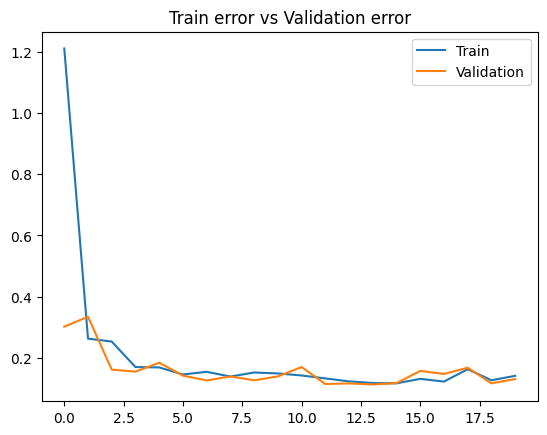

In [43]:
#Plotting between train and validation error for the configuration with highest model performance
df_acc = df_acc.sort_values('precision', ascending=False)

plt.plot(df_acc.at[0,'history'].history['loss'], label='Train')
plt.plot(df_acc.at[0,'history'].history['val_loss'], label='Validation')
plt.title("Train error vs Validation error")
plt.legend()

In [44]:
# Highlighting the highest performance of the mode
df_acc.sort_values('precision', ascending=False).drop(columns='history').style.apply(lambda x: ['background: green' if i==0 else '' for i in range(len(x))], axis=0)

,lr,reg_para,act_fn,test_accuracy,precision,recall,F1-score
22,0.001000,0.005000,tanh,0.986180,0.986988,0.986180,0.986120
16,0.001000,0.001000,relu,0.986180,0.986696,0.986180,0.986098
14,0.001000,0.010000,tanh,0.981244,0.983755,0.981244,0.981231
17,0.001000,0.001000,sigmoid,0.981244,0.981481,0.981244,0.980983
20,0.001000,0.005000,relu,0.980257,0.980375,0.980257,0.979934
7,0.010000,0.001000,LeakyReLU,0.979270,0.979686,0.979269,0.979161
4,0.010000,0.001000,relu,0.979270,0.979268,0.979269,0.978877
23,0.001000,0.005000,LeakyReLU,0.977295,0.977292,0.977295,0.976902
19,0.001000,0.001000,LeakyReLU,0.977295,0.977192,0.977295,0.976754
15,0.001000,0.010000,LeakyReLU,0.976308,0.977124,0.976308,0.974768


In [45]:
from tabulate import tabulate
print(tabulate(df_acc.sort_values('precision', ascending=False).drop(columns='history'), headers='keys', tablefmt='psql'))

+----+--------+------------+-----------+-----------------+-------------+----------+------------+
|    |     lr |   reg_para | act_fn    |   test_accuracy |   precision |   recall |   F1-score |
|----+--------+------------+-----------+-----------------+-------------+----------+------------|
| 22 | 0.001  |      0.005 | tanh      |        0.98618  |    0.986988 | 0.98618  |   0.98612  |
| 16 | 0.001  |      0.001 | relu      |        0.98618  |    0.986696 | 0.98618  |   0.986098 |
| 14 | 0.001  |      0.01  | tanh      |        0.981244 |    0.983755 | 0.981244 |   0.981231 |
| 17 | 0.001  |      0.001 | sigmoid   |        0.981244 |    0.981481 | 0.981244 |   0.980983 |
| 20 | 0.001  |      0.005 | relu      |        0.980257 |    0.980375 | 0.980257 |   0.979934 |
|  7 | 0.01   |      0.001 | LeakyReLU |        0.97927  |    0.979686 | 0.979269 |   0.979161 |
|  4 | 0.01   |      0.001 | relu      |        0.97927  |    0.979268 | 0.979269 |   0.978877 |
| 23 | 0.001  |      0.005 | L

#SVM

In [46]:
df1

,Time_of_Day,S2_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2,24.75,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2,24.75,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2,24.75,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2,24.75,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2,24.75,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2,25.13,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2,25.06,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2,25.06,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2,25.06,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [47]:
df_svm=df1

In [48]:
# Extract features and target variable
target_col = 'Room_Occupancy_Count'
y = df_svm[target_col]
X = df_svm.drop(columns=[target_col])
numerical_cols = X.select_dtypes(include=np.number).columns

# Split the dataset
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.2, random_state=0, stratify=y_train_raw)

# Undersample the training set
df_train_combined = pd.concat([X_train, y_train], axis=1)
undersampled_majority = df_train_combined[df_train_combined[target_col] == 0].sample(n=1000, replace=True, random_state=0)
df_undersampled = pd.concat([undersampled_majority, df_train_combined[df_train_combined[target_col] != 0]], ignore_index=True)

y_train = df_undersampled[target_col]
X_train = df_undersampled.drop(columns=[target_col])

# Oversample the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the data
numerical_cols = X_train.select_dtypes(include=np.number).columns
for column in numerical_cols:
    mean = np.mean(X_train[column], 0)
    std = np.std(X_train[column], 0)
    X_train[column] = (X_train[column] - mean) / std
    X_val[column] = (X_val[column] - mean) / std
    X_test_raw[column] = (X_test_raw[column] - mean) / std

# Convert target variables to DataFrame
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test_raw = pd.DataFrame(y_test_raw)

# Display the shapes of the datasets
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, X_test shape: {X_test_raw.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}, y_test shape: {y_test_raw.shape}")


X_train shape: (4000, 15), X_val shape: (1520, 15), X_test shape: (2533, 15)
y_train shape: (4000, 1), y_val shape: (1520, 1), y_test shape: (2533, 1)


##Without PCA Transformation

In [49]:

# Original train-test split
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(X_train, y_train, test_size=0.3,
                                                      random_state=0,
                                                      stratify=y_train)

# Further splits
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X_train_first, y_train_first, test_size=0.3,
                                                      random_state=0,
                                                      stratify=y_train_first)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_train_second, y_train_second, test_size=0.3,
                                                      random_state=0,
                                                      stratify=y_train_second)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_svm, y_train_svm, test_size=0.3,
                                                      random_state=0,
                                                      stratify=y_train_svm)

# X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_third, y_train_third, test_size=0.3,
#                                                       random_state=0,
#                                                       stratify=y_train_third)

# Convert to numpy arrays for X_train_svm
X_train_svm, X_test_svm, y_train_svm, y_test_svm = map(lambda x: x.to_numpy(), [X_train_svm, X_test_svm, y_train_svm, y_test_svm])

# Define additional y variables for y_train_svm
y0_train, y1_train, y2_train, y3_train = [np.where(y_train_svm == i, 1, -1) for i in range(4)]

# Convert to numpy arrays for X_train_s
X_train_s, X_test_s, y_train_s, y_test_s = map(lambda x: x.to_numpy(), [X_train_s, X_test_s, y_train_s, y_test_s])

# Define additional y variables for y_train_s
y0_train_s, y1_train_s, y2_train_s, y3_train_s = [np.where(y_train_s == i, 1, -1) for i in range(4)]


# Print statements with variable names
print("First Split - Shapes:", X_train_first.shape, X_test_first.shape, y_train_first.shape, y_test_first.shape)
print("Second Split - Shapes:", X_train_second.shape, X_test_second.shape, y_train_second.shape, y_test_second.shape)
print("SVM Split - Shapes:", X_train_svm.shape, X_test_svm.shape, y_train_svm.shape, y_test_svm.shape)
# print("Third Split - Shapes:", X_train_third.shape, X_test_third.shape, y_train_third.shape, y_test_third.shape)
print("Final Split (S) - Shapes:", X_train_s.shape, X_test_s.shape, y_train_s.shape, y_test_s.shape)


First Split - Shapes: (2800, 15) (1200, 15) (2800, 1) (1200, 1)
Second Split - Shapes: (1960, 15) (840, 15) (1960, 1) (840, 1)
SVM Split - Shapes: (1372, 15) (588, 15) (1372, 1) (588, 1)
Final Split (S) - Shapes: (960, 15) (412, 15) (960, 1) (412, 1)


In [50]:
from os import supports_effective_ids
@dataclass
class SoftMarginSVM2:

  C: float

  def dualSVM(self,alpha, gramXy):
    return alpha.sum() - 0.5 * alpha.dot(alpha.dot(gramXy))


  def jacobian_dualSVM(self,alpha, gramXy):
    return np.ones(len(alpha)) - alpha.dot(gramXy)


  def fit(self, X, y):

    N, n_features = X.shape

    y = y.reshape(-1, 1)

    Xy = X * y
    gramXy = np.matmul(Xy, Xy.T)

    alphas = np.zeros(N)
    alpha_bounds = Bounds(np.zeros(N), np.ones(N) * self.C)

    constraints = ({'type':'eq',
                    'fun': lambda alpha: np.dot(alpha, y).item(),
                    'jac': lambda alpha: -y.flatten()})

    slsqp = optimize.minimize(fun = lambda a: -self.dualSVM(a, gramXy),
                              x0 = alphas,
                              jac = lambda a: -self.jacobian_dualSVM(a, gramXy),
                              constraints = constraints,
                              bounds = alpha_bounds,
                              method = 'SLSQP')

    self.alphas = slsqp.x

    self.w = np.sum(Xy.T.dot(self.alphas[:, np.newaxis]), axis=1)
    epsilon = 0.0001
    self.support_vectors = X[self.alphas > epsilon]
    self.support_labels = y[self.alphas > epsilon]

    b = []
    for i in range(len(self.support_vectors)):
      b_i = self.support_labels[i] - np.matmul(self.support_vectors[i].T, self.w.T)
      b.append(b_i)

    self.b = sum(b)/len(b)

C: 0.01


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


	Accuracy : 0.9053398058252428
	Precision : 0.9046675703873508
	Recall : 0.9053398058252428
	F1 score : 0.9046175282885148


<ipython-input-51-ef0c26a386a9>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Parameter(C)': C, 'Accuracy': accuracy,


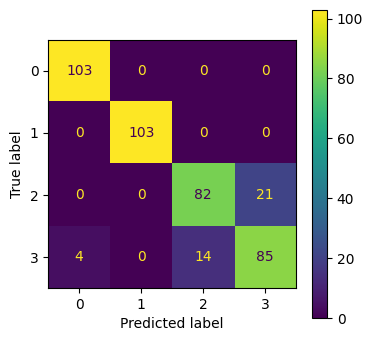




C: 0.1
	Accuracy : 0.941747572815534
	Precision : 0.9421817765567766
	Recall : 0.941747572815534
	F1 score : 0.9406645800741811


<ipython-input-51-ef0c26a386a9>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Parameter(C)': C, 'Accuracy': accuracy,


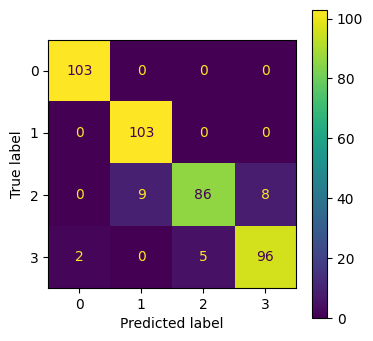




C: 1.0
	Accuracy : 0.9466019417475728
	Precision : 0.947092988533206
	Recall : 0.9466019417475728
	F1 score : 0.9457035942374669


<ipython-input-51-ef0c26a386a9>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Parameter(C)': C, 'Accuracy': accuracy,


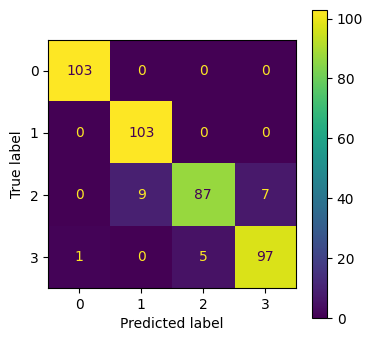




   Parameter(C)  Accuracy  Precision    Recall  F1 score
2          1.00  0.946602   0.947093  0.946602  0.945704
1          0.10  0.941748   0.942182  0.941748  0.940665
0          0.01  0.905340   0.904668  0.905340  0.904618


In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define a list of C values
C_values = [0.01, 0.1, 1.0]

# Initialize an empty DataFrame to store results
result_df = pd.DataFrame(columns=['Parameter(C)', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

for C in C_values:
    print("C: {}".format(C))

    # Initialize empty lists to store results
    w_list = []
    b_list = []
    y_list = []

    # Initialize SoftMarginSVM2 for the current C value
    soft_margin = SoftMarginSVM2(C=C)

    # Fit the model for each class and store the results
    for i in range(4):  # 4 classes (0, 1, 2, 3)
        Xi_train = globals()['X_train_s']
        yi_train = globals()['y{}_train_s'.format(i)]
        Xi_test_s = globals()['X_test_s']

        soft_margin.fit(Xi_train, yi_train)
        w = soft_margin.w.reshape(15, 1)
        b = soft_margin.b

        w_list.append(w)
        b_list.append(b)

        # Make predictions on the test set
        y = Xi_test_s.dot(w) + b
        y_list.append(y)

    # Concatenate and process the results
    w_array = np.concatenate(w_list, axis=1)
    b_array = np.array(b_list)
    y_concat_s = np.concatenate(y_list, axis=1)
    max_y_s = np.argmax(y_concat_s, axis=1)

    # Use classification_report to calculate metrics
    report = classification_report(y_test_s, max_y_s, target_names=['0', '1', '2', '3'], output_dict=True)

    # Extract metrics
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_svm_score = report['macro avg']['f1-score']

    print("\tAccuracy : {}".format(accuracy))
    print("\tPrecision : {}".format(precision))
    print("\tRecall : {}".format(recall))
    print("\tF1 score : {}".format(f1_svm_score))

    # Append results to the DataFrame
    result_df = result_df.append({'Parameter(C)': C, 'Accuracy': accuracy,
                                  'Precision': precision, 'Recall': recall, 'F1 score': f1_svm_score},
                                 ignore_index=True)

    fig, ax = plt.subplots(figsize=(4, 4))
    cm = confusion_matrix(y_test_s, max_y_s)
    cmp = ConfusionMatrixDisplay(cm)
    cmp.plot(ax=ax)
    plt.show()
    print("\n\n")

# Sort the DataFrame by Precision
result_df = result_df.sort_values(by='Precision', ascending=False)

# Display the results DataFrame
print(result_df)


##With PCA Transformation

In [52]:
pca_svm = PCA(X_train)
pca_svm.fit()
X_train_pca = pca_svm.transform(X_train,8)
X_val_pca = pca_svm.transform(X_val,8)
X_test_pca = pca_svm.transform(X_test_raw,8)

Variance captured by 1 Principal Components is 40.21%
Variance captured by 2 Principal Components is 51.24%
Variance captured by 3 Principal Components is 60.86%
Variance captured by 4 Principal Components is 67.55%
Variance captured by 5 Principal Components is 73.45%
Variance captured by 6 Principal Components is 78.66%
Variance captured by 7 Principal Components is 82.73%
Variance captured by 8 Principal Components is 86.65%
Variance captured by 9 Principal Components is 90.26%
Variance captured by 10 Principal Components is 93.35%
Variance captured by 11 Principal Components is 95.38%
Variance captured by 12 Principal Components is 97.06%
Variance captured by 13 Principal Components is 98.55%
Variance captured by 14 Principal Components is 99.29%
Variance captured by 15 Principal Components is 100.0%


In [53]:
# Original train-test split
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(X_train_pca, y_train, test_size=0.3,
                                                      random_state=0,
                                                      stratify=y_train)

# Further splits
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X_train_first, y_train_first, test_size=0.3,
                                                      random_state=0,
                                                      stratify=y_train_first)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_train_second, y_train_second, test_size=0.3,
                                                      random_state=0,
                                                      stratify=y_train_second)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_svm, y_train_svm, test_size=0.3,
                                                      random_state=0,
                                                      stratify=y_train_svm)

# X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_third, y_train_third, test_size=0.3,
#                                                       random_state=0,
#                                                       stratify=y_train_third)

# Convert to numpy arrays for X_train_svm
# X_train_svm, X_test_svm, y_train_svm, y_test_svm = map(lambda x: x.to_numpy(), [X_train_svm, X_test_svm, y_train_svm, y_test_svm])

# Define additional y variables for y_train_svm
y0_train, y1_train, y2_train, y3_train = [np.where(y_train_svm == i, 1, -1) for i in range(4)]

# Convert to numpy arrays for X_train_s
# X_train_s, X_test_s, y_train_s, y_test_s = map(lambda x: x.to_numpy(), [X_train_s, X_test_s, y_train_s, y_test_s])

# Define additional y variables for y_train_s
y0_train_s, y1_train_s, y2_train_s, y3_train_s = [np.where(y_train_s == i, 1, -1) for i in range(4)]


# Print statements with variable names
print("First Split - Shapes:", X_train_first.shape, X_test_first.shape, y_train_first.shape, y_test_first.shape)
print("Second Split - Shapes:", X_train_second.shape, X_test_second.shape, y_train_second.shape, y_test_second.shape)
print("SVM Split - Shapes:", X_train_svm.shape, X_test_svm.shape, y_train_svm.shape, y_test_svm.shape)
# print("Third Split - Shapes:", X_train_third.shape, X_test_third.shape, y_train_third.shape, y_test_third.shape)
print("Final Split (S) - Shapes:", X_train_s.shape, X_test_s.shape, y_train_s.shape, y_test_s.shape)


First Split - Shapes: (2800, 8) (1200, 8) (2800, 1) (1200, 1)
Second Split - Shapes: (1960, 8) (840, 8) (1960, 1) (840, 1)
SVM Split - Shapes: (1372, 8) (588, 8) (1372, 1) (588, 1)
Final Split (S) - Shapes: (960, 8) (412, 8) (960, 1) (412, 1)


C: 0.01


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


	Accuracy : 0.8203883495145631
	Precision : 0.8209736812986539
	Recall : 0.8203883495145632
	F1 score : 0.8188755208306748


<ipython-input-54-81600d6eb033>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Parameter(C)': C, 'Accuracy': accuracy,


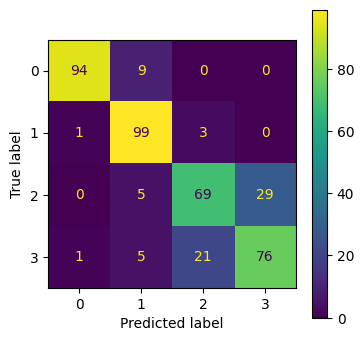




C: 0.1
	Accuracy : 0.8300970873786407
	Precision : 0.8289498369337078
	Recall : 0.8300970873786409
	F1 score : 0.828582924923096


<ipython-input-54-81600d6eb033>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Parameter(C)': C, 'Accuracy': accuracy,


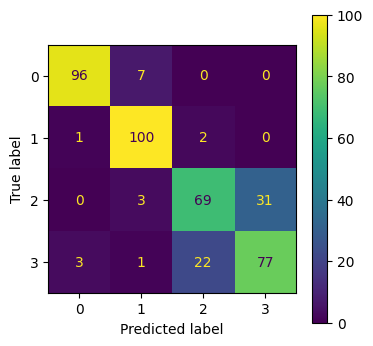




C: 1.0
	Accuracy : 0.8398058252427184
	Precision : 0.8394403542918395
	Recall : 0.8398058252427185
	F1 score : 0.8384671466625923


<ipython-input-54-81600d6eb033>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Parameter(C)': C, 'Accuracy': accuracy,


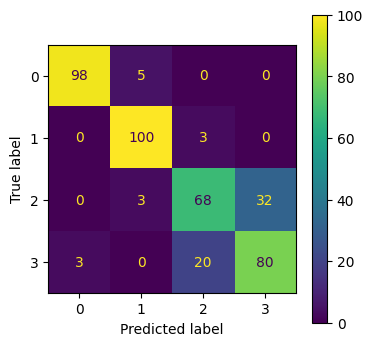




   Parameter(C)  Accuracy  Precision    Recall  F1 score
2          1.00  0.839806   0.839440  0.839806  0.838467
1          0.10  0.830097   0.828950  0.830097  0.828583
0          0.01  0.820388   0.820974  0.820388  0.818876


In [54]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define a list of C values
C_values = [0.01, 0.1, 1.0]

# Initialize an empty DataFrame to store results
result_df = pd.DataFrame(columns=['Parameter(C)', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

for C in C_values:
    print("C: {}".format(C))

    # Initialize empty lists to store results
    w_list = []
    b_list = []
    y_list = []

    # Initialize SoftMarginSVM2 for the current C value
    soft_margin_pca = SoftMarginSVM2(C=C)

    # Fit the model for each class and store the results
    for i in range(4):  # 4 classes (0, 1, 2, 3)
        Xi_train = globals()['X_train_s']
        yi_train = globals()['y{}_train_s'.format(i)]
        Xi_test_s = globals()['X_test_s']

        soft_margin_pca.fit(Xi_train, yi_train)
        w = soft_margin_pca.w.reshape(8, 1)
        b = soft_margin_pca.b

        w_list.append(w)
        b_list.append(b)

        # Make predictions on the test set
        y = Xi_test_s.dot(w) + b
        y_list.append(y)

    # Concatenate and process the results
    w_array = np.concatenate(w_list, axis=1)
    b_array = np.array(b_list)
    y_concat_s = np.concatenate(y_list, axis=1)
    max_y_s = np.argmax(y_concat_s, axis=1)

    # Use classification_report to calculate metrics
    report = classification_report(y_test_s, max_y_s, target_names=['0', '1', '2', '3'], output_dict=True)

    # Extract metrics
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_svm_score = report['macro avg']['f1-score']

    print("\tAccuracy : {}".format(accuracy))
    print("\tPrecision : {}".format(precision))
    print("\tRecall : {}".format(recall))
    print("\tF1 score : {}".format(f1_svm_score))

    # Append results to the DataFrame
    result_df = result_df.append({'Parameter(C)': C, 'Accuracy': accuracy,
                                  'Precision': precision, 'Recall': recall, 'F1 score': f1_svm_score},
                                 ignore_index=True)

    fig, ax = plt.subplots(figsize=(4, 4))
    cm = confusion_matrix(y_test_s, max_y_s)
    cmp = ConfusionMatrixDisplay(cm)
    cmp.plot(ax=ax)
    plt.show()
    print("\n\n")

# Sort the DataFrame by Precision
result_df = result_df.sort_values(by='Precision', ascending=False)

# Display the results DataFrame
print(result_df)
